# `Tugas 1  - Advance Machine Learning (14230018 - Ilham Maulana)`

# `1. Buatlah tulisan singkat terkait dataset yang kamu pilih`

## `1.A Dari mana diambil`

Data diambil dari prestasi siswa dalam pendidikan menengah di dua sekolah Portugis. Atribut data mencakup nilai siswa, demografi, fitur sosial, dan sekolah, dan dikumpulkan dengan menggunakan laporan sekolah dan kuesioner.

Data disediakan untuk dua subjek yang berbeda:
*   Matematika `(mat)`
*   Bahasa Portugis `(por)`

Sumber data ini adalah dari paper yang ditulis oleh **[Cortez and Silva, 2008]
**

http://archive.ics.uci.edu/dataset/320/student+performance

## `1.B Bagaimana proses pengambilan datanya`

data dalam bentuk csv, kemudian diupload di github agar bisa diakses.

In [298]:
# Import Libbrary yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

url_mat = "https://raw.githubusercontent.com/k4ilham/machineLearning/main/hi/student-mat.csv"
url_por = "https://raw.githubusercontent.com/k4ilham/machineLearning/main/hi/student-por.csv"

# Membaca data CSV
mat = pd.read_csv(url_mat, sep=";")
por = pd.read_csv(url_por, sep=";")

# Data Frame Mat & Por
df = pd.concat([mat, por], ignore_index=True)

df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## `1.C Jumlah sample data`

In [299]:
# Jumlah sampel data dalam DataFrame "mat"
num_samples_mat = mat.shape[0]

# Jumlah sampel data dalam DataFrame "por"
num_samples_por = por.shape[0]

# Jumlah sampel data dalam DataFrame "df"
num_samples_df = df.shape[0]

print("Jumlah sample data dalam mat:", num_samples_mat)
print("Jumlah sample data dalam por:", num_samples_por)
print("Jumlah sample data dalam df:", num_samples_df)


Jumlah sample data dalam mat: 395
Jumlah sample data dalam por: 649
Jumlah sample data dalam df: 1044


dataset diatas memiliki:
*   649 sampel untuk mata pelajaran Bahasa Portugis `(por)`.
*   395 sampel untuk mata pelajaran Matematika `(mat)`.


## `1.D Jumlah fitur`

Berdasarkan dataset **Student Performance** yang dianalisis oleh Cortez and Silva pada tahun 2008,
dataset tersebut memiliki **33 atribut (fitur)** informasi.

Fitur-fitur ini mencakup informasi demografis, sosial, dan terkait sekolah siswa, serta termasuk juga nilai-nilai G1, G2, dan G3.

In [300]:
# Menghitung Jumlah Fitur
print("Jumlah Fitur : ",len(df.columns))

Jumlah Fitur :  33


In [301]:
for i, col in enumerate(df.columns):
    print(f"{i+1}: {col}")


1: school
2: sex
3: age
4: address
5: famsize
6: Pstatus
7: Medu
8: Fedu
9: Mjob
10: Fjob
11: reason
12: guardian
13: traveltime
14: studytime
15: failures
16: schoolsup
17: famsup
18: paid
19: activities
20: nursery
21: higher
22: internet
23: romantic
24: famrel
25: freetime
26: goout
27: Dalc
28: Walc
29: health
30: absences
31: G1
32: G2
33: G3


## `1.E Distribusi kelas (jika klasifikasi)`

Data Cleaning

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [303]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [304]:
class_distribution = df['school'].value_counts()
print(class_distribution)

GP    772
MS    272
Name: school, dtype: int64


#`2. Explorasi dan visualisasi dataset dengan python`

In [305]:
# Menampilkan data frame
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [306]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [307]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [308]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 16) & (df.final_score <= 20), 'final_grade'] = 'good'
df.loc[(df.final_score >= 12) & (df.final_score <= 15), 'final_grade'] = 'fair'
df.loc[(df.final_score >= 0) & (df.final_score <= 11), 'final_grade'] = 'poor'
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,poor


In [309]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

In [310]:
df.isna().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parents_status           0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
period1_score            0
period2_score            0
final_score              0
final_grade              0
dtype: int64

In [311]:
df.dtypes

school                   object
sex                      object
age                       int64
address                  object
family_size              object
parents_status           object
mother_education          int64
father_education          int64
mother_job               object
father_job               object
reason                   object
guardian                 object
commute_time              int64
study_time                int64
failures                  int64
school_support           object
family_support           object
paid_classes             object
activities               object
nursery                  object
desire_higher_edu        object
internet                 object
romantic                 object
family_quality            int64
free_time                 int64
go_out                    int64
weekday_alcohol_usage     int64
weekend_alcohol_usage     int64
health                    int64
absences                  int64
period1_score             int64
period2_

In [312]:
clinical_attributes = df.iloc[:, :-1]
clinical_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support       

In [313]:
df['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

In [314]:
df['sex'].value_counts()

F    591
M    453
Name: sex, dtype: int64

In [315]:
df['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

In [316]:
df['final_grade'].value_counts()

poor    534
fair    388
good    122
Name: final_grade, dtype: int64

In [317]:
df.shape

(1044, 34)

In [318]:
df.dropna().shape # their is no null value "fortunately:)"

(1044, 34)

Text(0.5, 1.0, 'Correlation Heatmap')

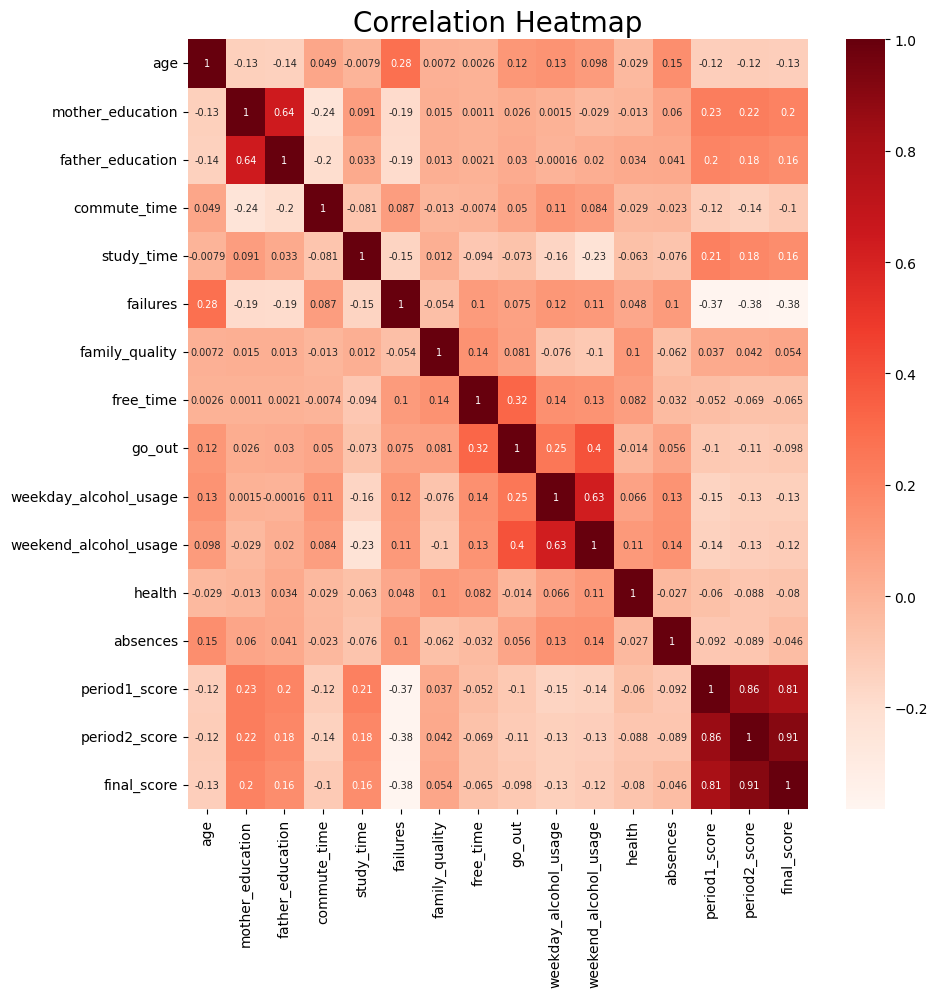

In [319]:
# see correlation between variables through a correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds", annot_kws={"size": 7})
plt.title('Correlation Heatmap', fontsize=20)

## `2.A Tampilkan 10 data pertama`

In [320]:
print(df.head(10))

  school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   
5     GP   M   16       U         LE3              T                 4   
6     GP   M   16       U         LE3              T                 2   
7     GP   F   17       U         GT3              A                 4   
8     GP   M   15       U         LE3              A                 3   
9     GP   M   15       U         GT3              T                 3   

   father_education mother_job father_job  ... free_time go_out  \
0                 4    at_home    teacher  ...         3      4   
1                 1    at_home      other  ...     

## `2.B Tampilkan statistik (Jumlah data setiap kelas) dari dataset tersebut dalam Bar atau Pie-Chart`

### `2.B.1 student's school`
`(binary: "GP" or "MS")`

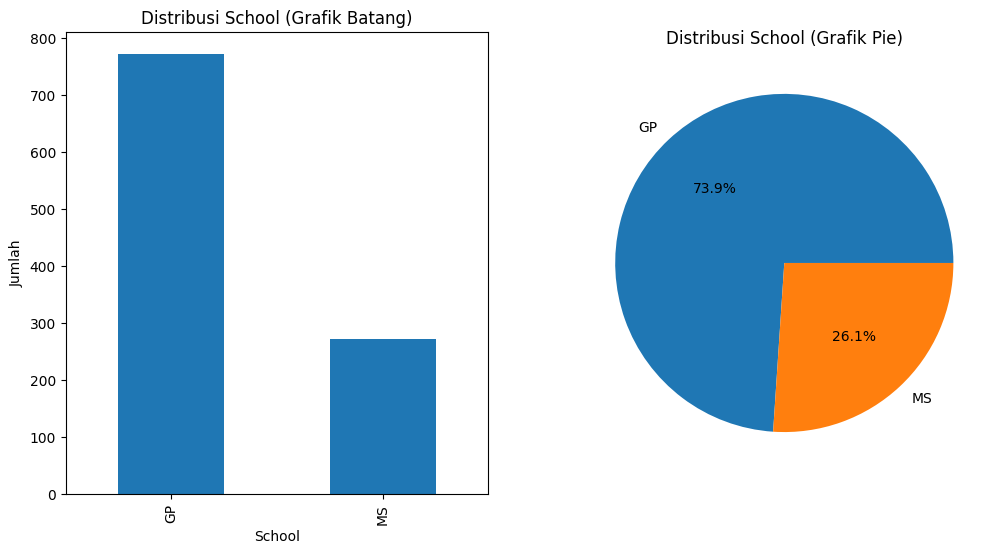

In [321]:
# Menghitung distribusi nilai dalam kolom 'school'
school_counts = df['school'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
school_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi School (Grafik Batang)')
ax1.set_xlabel('School')
ax1.set_ylabel('Jumlah')

# Grafik pie
school_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi School (Grafik Pie)')
ax2.set_ylabel('')

plt.show()

### `2.B.2 student's sex `
`(binary: "F" - female or "M" - male)`

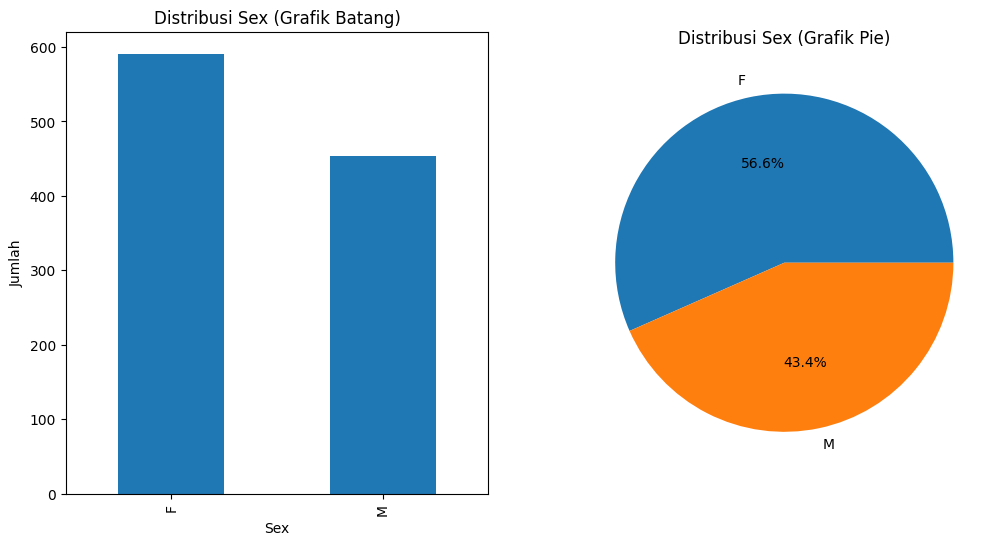

In [322]:
# Menghitung distribusi nilai dalam kolom 'sex'
sex_counts = df['sex'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
sex_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Sex (Grafik Batang)')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Jumlah')

# Grafik pie
sex_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Sex (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.3  student's age `
`(numeric: from 15 to 22)`

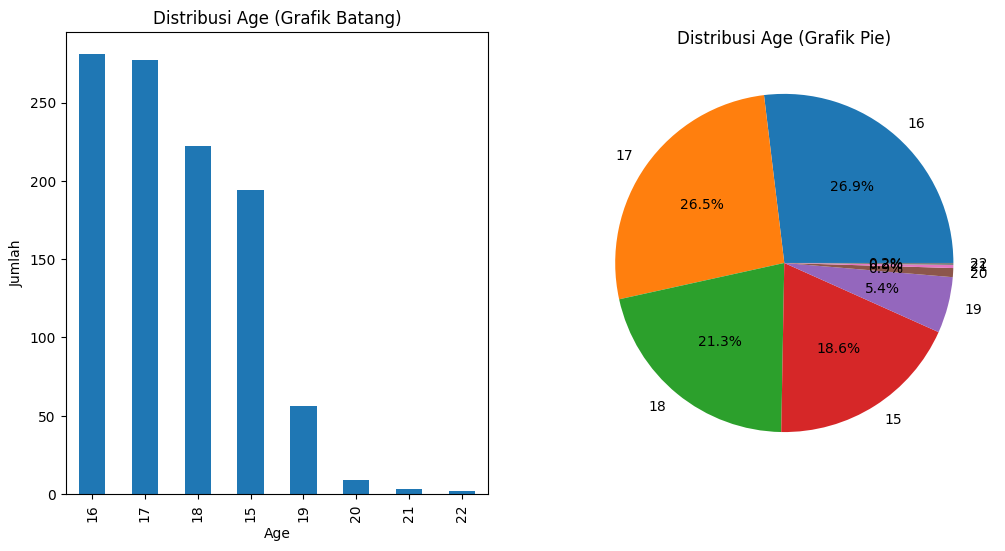

In [323]:
# Menghitung distribusi nilai dalam kolom 'age'
age_counts = df['age'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
age_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Age (Grafik Batang)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Jumlah')

# Grafik pie
age_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Age (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.4 student's home address type `
`(binary: "U" - urban or "R" - rural)`

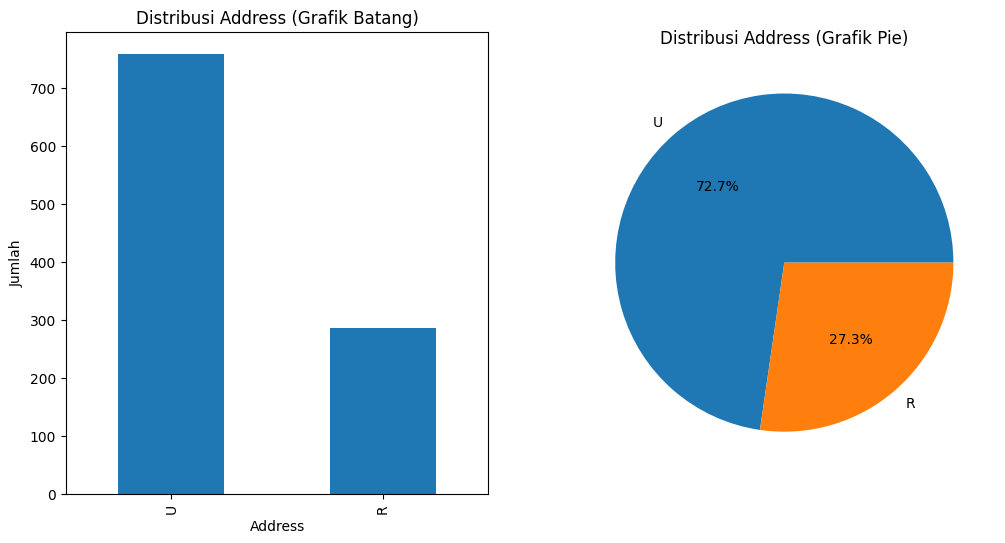

In [324]:
# Menghitung distribusi nilai dalam kolom 'address'
address_counts = df['address'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
address_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Address (Grafik Batang)')
ax1.set_xlabel('Address')
ax1.set_ylabel('Jumlah')

# Grafik pie
address_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Address (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.5 family size `
`(binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)`

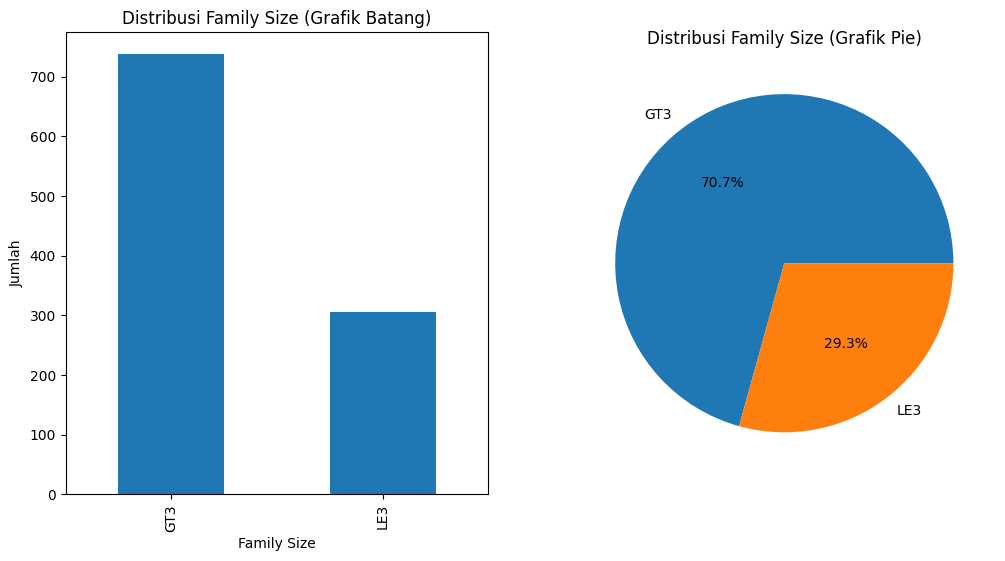

In [325]:
# Menghitung distribusi nilai dalam kolom 'family_size'
family_size_counts = df['family_size'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
family_size_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Family Size (Grafik Batang)')
ax1.set_xlabel('Family Size')
ax1.set_ylabel('Jumlah')

# Grafik pie
family_size_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Family Size (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.6 parent's cohabitation status `
`(binary: "T" - living together or "A" - apart)`

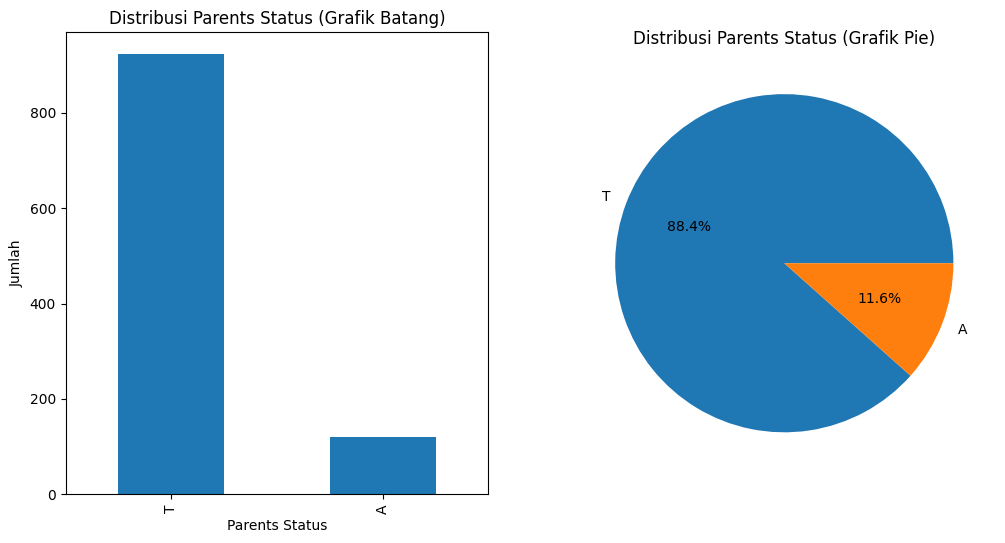

In [326]:
# Menghitung distribusi nilai dalam kolom 'parents_status'
parents_status_counts = df['parents_status'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
parents_status_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Parents Status (Grafik Batang)')
ax1.set_xlabel('Parents Status')
ax1.set_ylabel('Jumlah')

# Grafik pie
parents_status_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Parents Status (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.7 mother's education`

`(numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)`

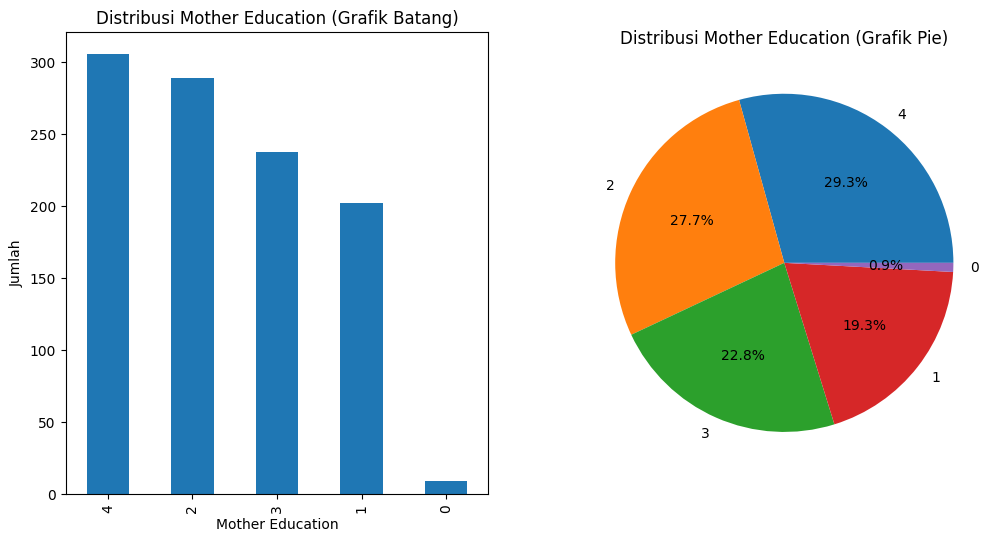

In [327]:
# Menghitung distribusi nilai dalam kolom 'mother_education'
mother_education_counts = df['mother_education'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
mother_education_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Mother Education (Grafik Batang)')
ax1.set_xlabel('Mother Education')
ax1.set_ylabel('Jumlah')

# Grafik pie
mother_education_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Mother Education (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.8 father's education `

`(numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)`

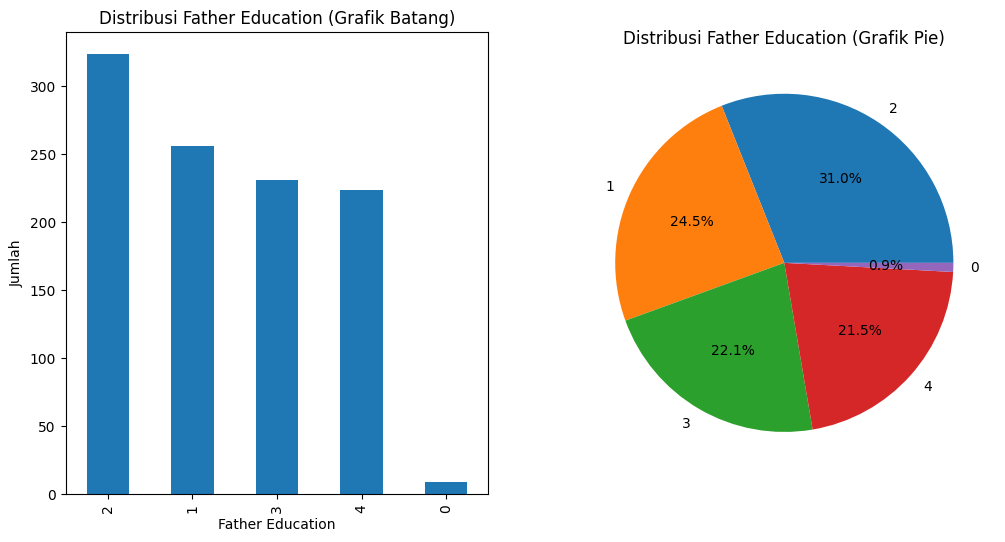

In [328]:
# Menghitung distribusi nilai dalam kolom 'father_education'
father_education_counts = df['father_education'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
father_education_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Father Education (Grafik Batang)')
ax1.set_xlabel('Father Education')
ax1.set_ylabel('Jumlah')

# Grafik pie
father_education_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Father Education (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.9  mother's job `
`(nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")`

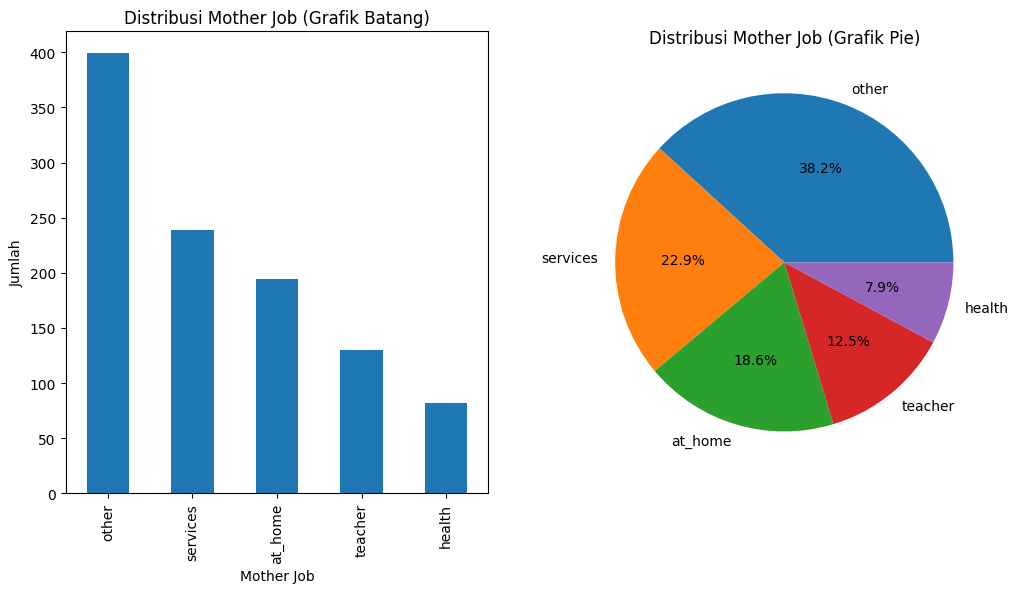

In [329]:
# Menghitung distribusi nilai dalam kolom 'mother_job'
mother_job_counts = df['mother_job'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
mother_job_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Mother Job (Grafik Batang)')
ax1.set_xlabel('Mother Job')
ax1.set_ylabel('Jumlah')

# Grafik pie
mother_job_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Mother Job (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.10  father's job `
`(nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

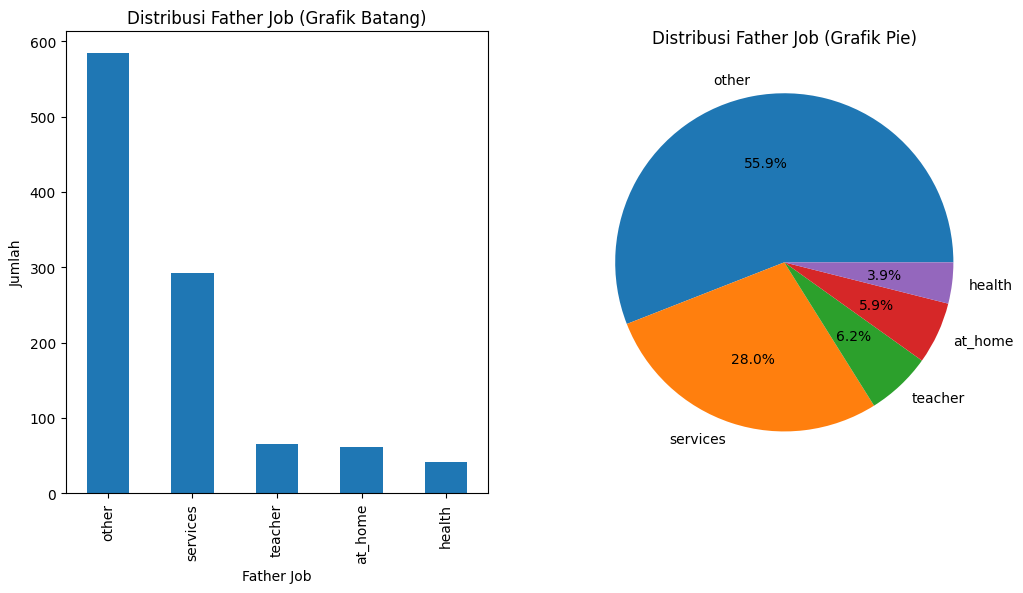

In [330]:
# Menghitung distribusi nilai dalam kolom 'father_job'
father_job_counts = df['father_job'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
father_job_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Father Job (Grafik Batang)')
ax1.set_xlabel('Father Job')
ax1.set_ylabel('Jumlah')

# Grafik pie
father_job_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Father Job (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.11  reason to choose this school `
`(nominal: close to "home", school "reputation", "course" preference or "other")`

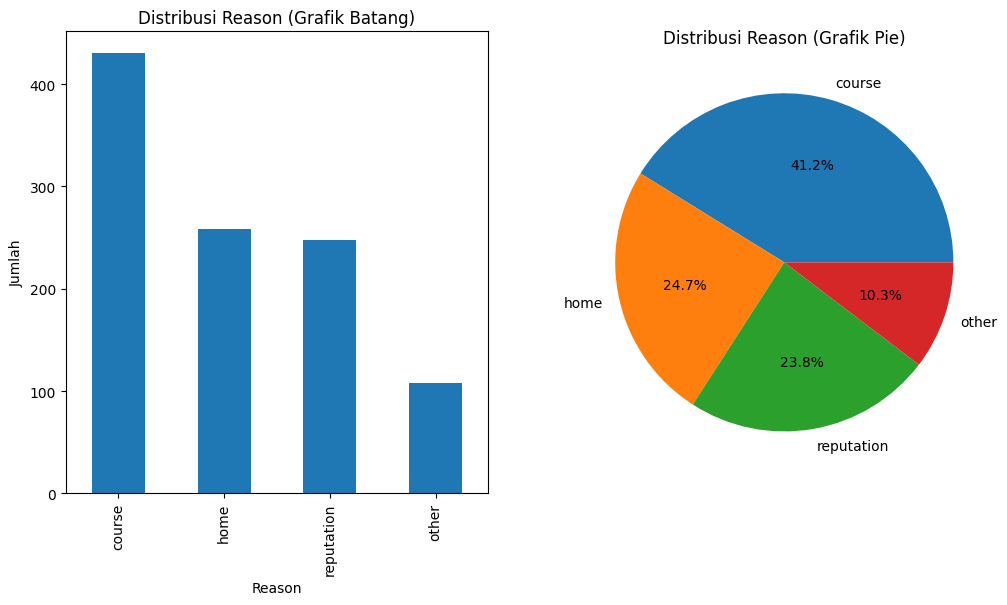

In [331]:
# Menghitung distribusi nilai dalam kolom 'reason'
reason_counts = df['reason'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
reason_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Reason (Grafik Batang)')
ax1.set_xlabel('Reason')
ax1.set_ylabel('Jumlah')

# Grafik pie
reason_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Reason (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.12  student's guardian`
`(nominal: "mother", "father" or "other")`

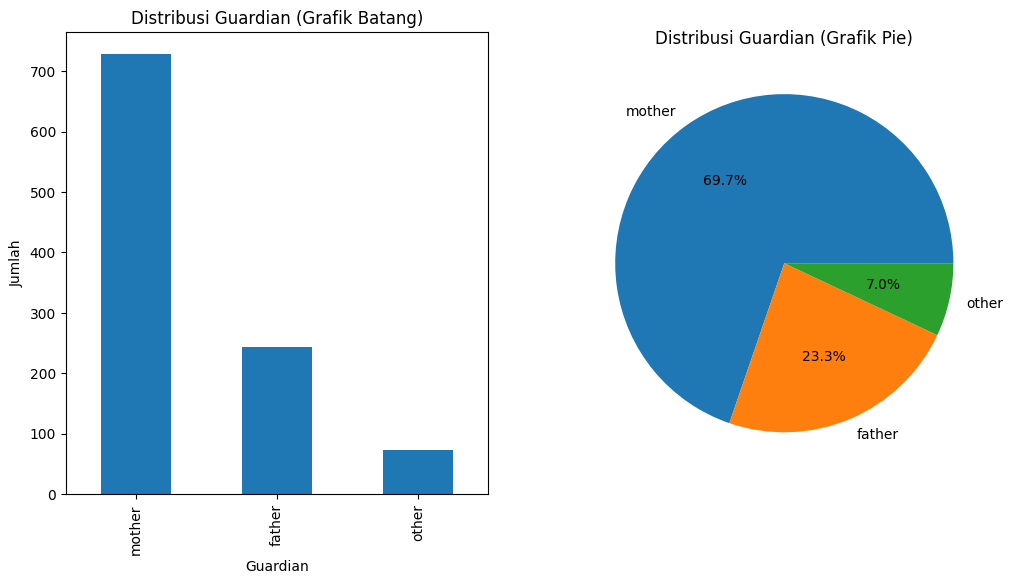

In [332]:
# Menghitung distribusi nilai dalam kolom 'guardian'
guardian_counts = df['guardian'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
guardian_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Guardian (Grafik Batang)')
ax1.set_xlabel('Guardian')
ax1.set_ylabel('Jumlah')

# Grafik pie
guardian_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Guardian (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.13   home to school travel time `
`(numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)`

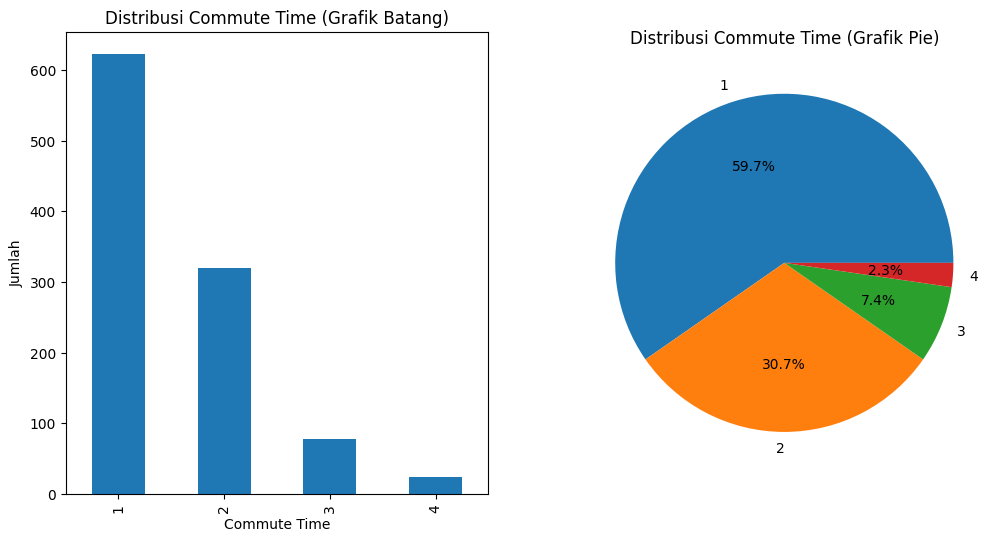

In [333]:
# Menghitung distribusi nilai dalam kolom 'commute_time'
commute_time_counts = df['commute_time'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
commute_time_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Commute Time (Grafik Batang)')
ax1.set_xlabel('Commute Time')
ax1.set_ylabel('Jumlah')

# Grafik pie
commute_time_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Commute Time (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.14 weekly study time `
`(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)`

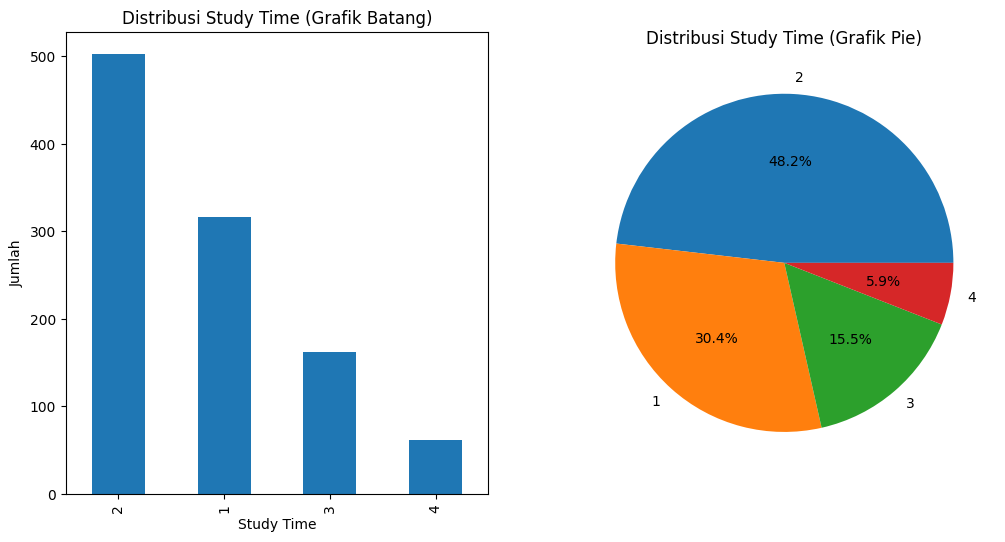

In [334]:
# Menghitung distribusi nilai dalam kolom 'study_time'
study_time_counts = df['study_time'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
study_time_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Study Time (Grafik Batang)')
ax1.set_xlabel('Study Time')
ax1.set_ylabel('Jumlah')

# Grafik pie
study_time_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Study Time (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.15 number of past class failures `
`(numeric: n if 1<=n<3, else 4)`

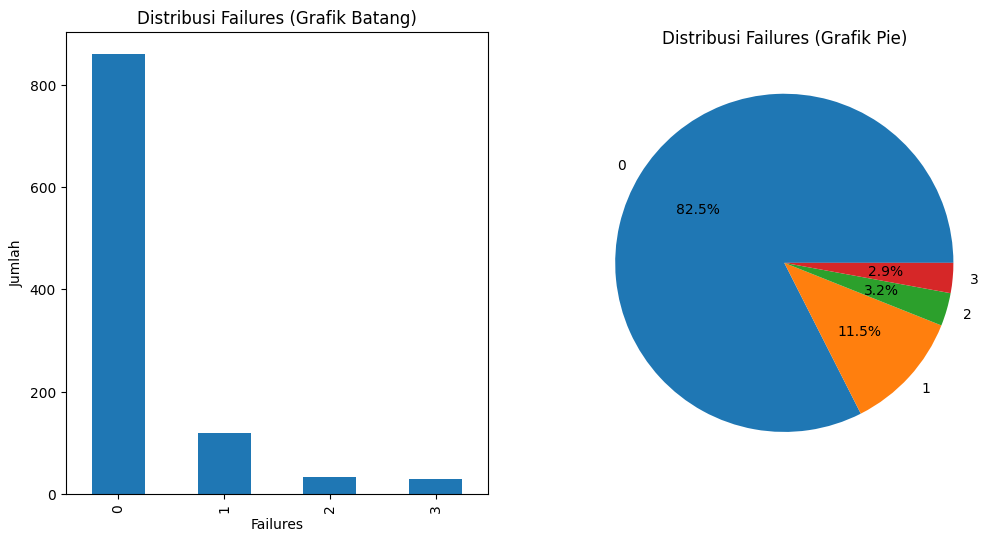

In [335]:
# Menghitung distribusi nilai dalam kolom 'failures'
failures_counts = df['failures'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
failures_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Failures (Grafik Batang)')
ax1.set_xlabel('Failures')
ax1.set_ylabel('Jumlah')

# Grafik pie
failures_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Failures (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.16 extra educational support `
`(binary: yes or no)`

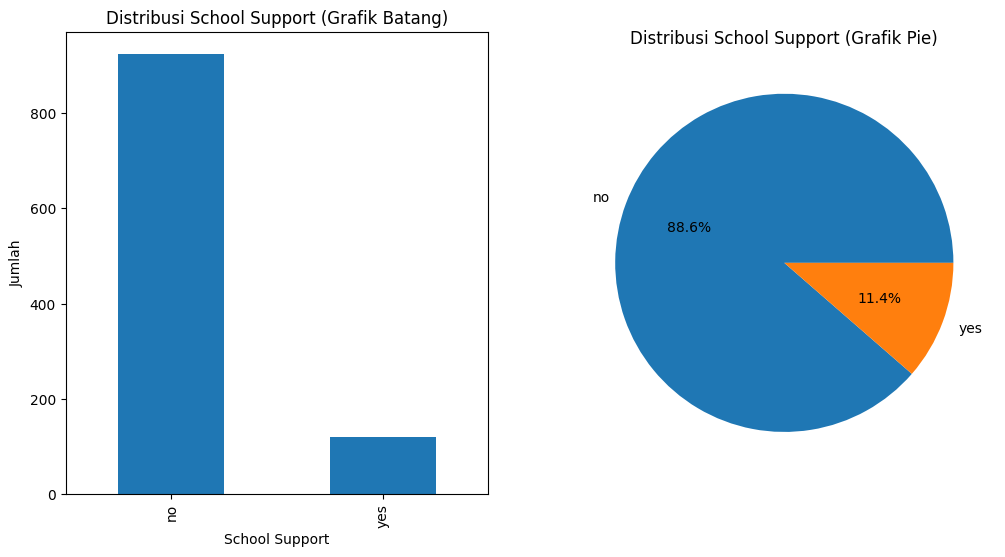

In [336]:
# Menghitung distribusi nilai dalam kolom 'school_support'
school_support_counts = df['school_support'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
school_support_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi School Support (Grafik Batang)')
ax1.set_xlabel('School Support')
ax1.set_ylabel('Jumlah')

# Grafik pie
school_support_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi School Support (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.17 family educational support `
`(binary: yes or no)`

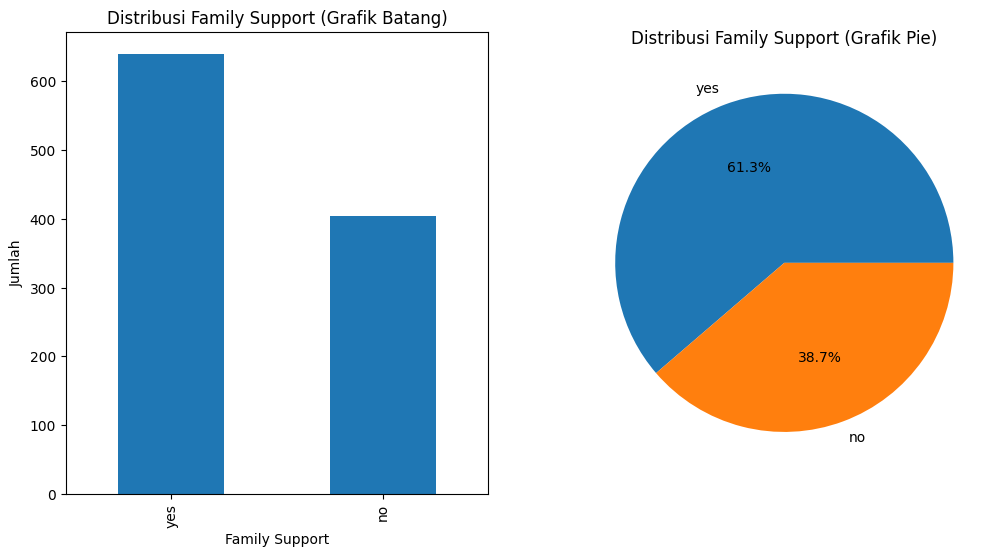

In [337]:
# Menghitung distribusi nilai dalam kolom 'family_support'
family_support_counts = df['family_support'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
family_support_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Family Support (Grafik Batang)')
ax1.set_xlabel('Family Support')
ax1.set_ylabel('Jumlah')

# Grafik pie
family_support_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Family Support (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.18 extra paid classes within the course subject `
`(Math or Portuguese) (binary: yes or no)`

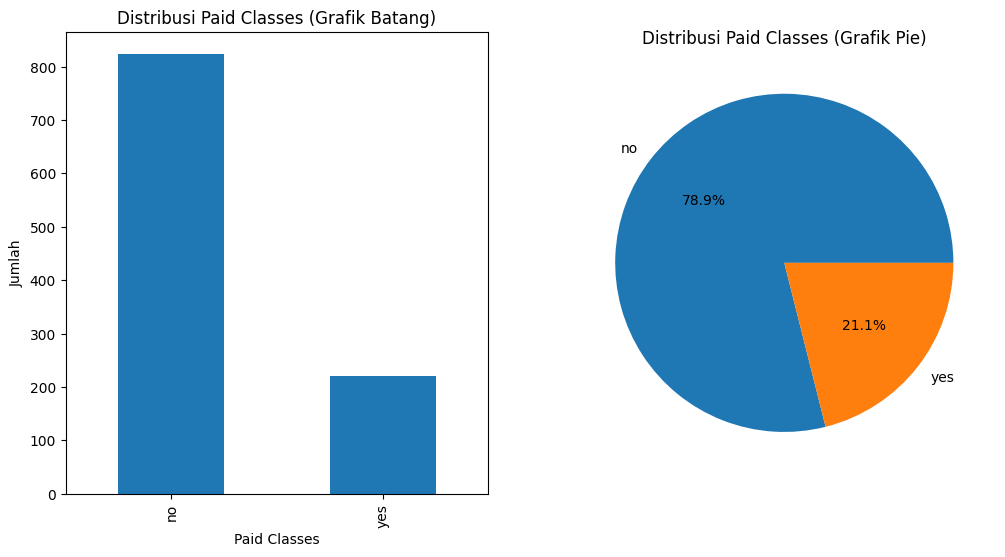

In [338]:
# Menghitung distribusi nilai dalam kolom 'paid_classes'
paid_classes_counts = df['paid_classes'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
paid_classes_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Paid Classes (Grafik Batang)')
ax1.set_xlabel('Paid Classes')
ax1.set_ylabel('Jumlah')

# Grafik pie
paid_classes_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Paid Classes (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.19 extra-curricular activities `
`(binary: yes or no)`

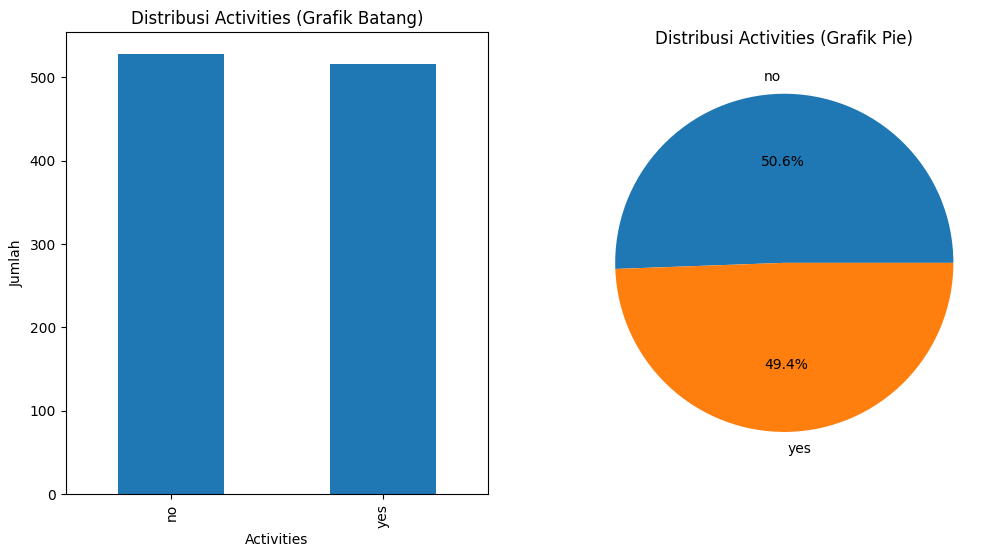

In [339]:
# Menghitung distribusi nilai dalam kolom 'activities'
activities_counts = df['activities'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
activities_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Activities (Grafik Batang)')
ax1.set_xlabel('Activities')
ax1.set_ylabel('Jumlah')

# Grafik pie
activities_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Activities (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.20  attended nursery school `
`(binary: yes or no)`

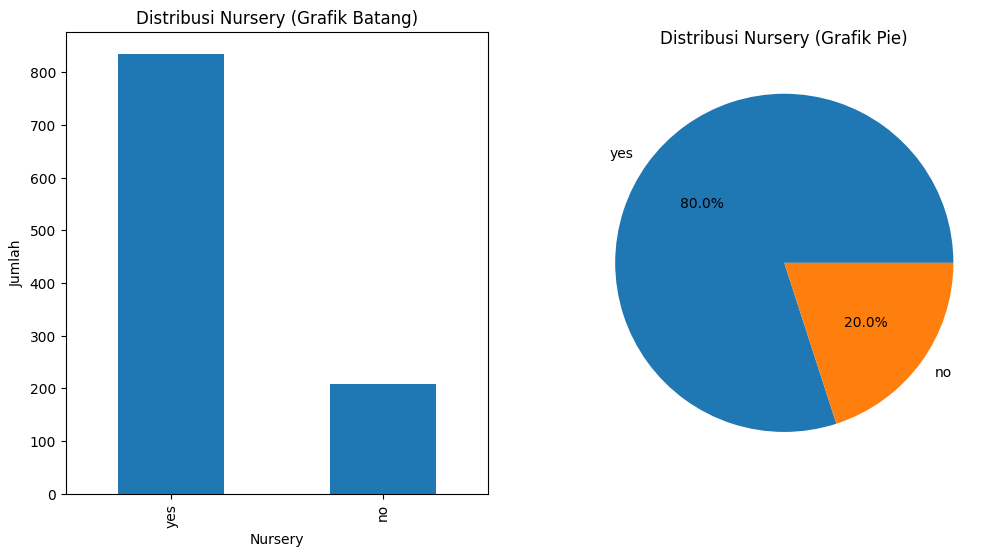

In [340]:
# Menghitung distribusi nilai dalam kolom 'nursery'
nursery_counts = df['nursery'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
nursery_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Nursery (Grafik Batang)')
ax1.set_xlabel('Nursery')
ax1.set_ylabel('Jumlah')

# Grafik pie
nursery_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Nursery (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.21 wants to take higher education `
`(binary: yes or no)`

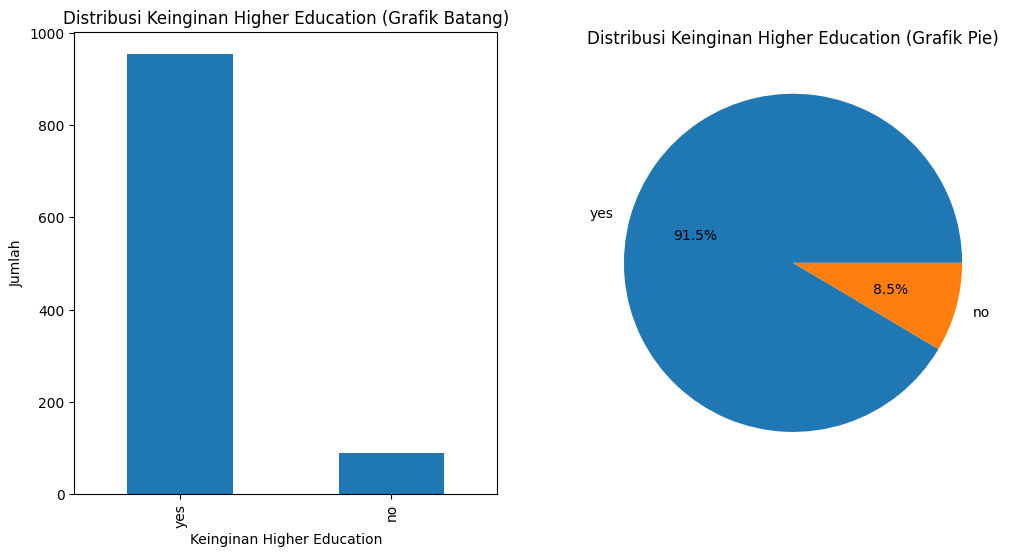

In [341]:
# Menghitung distribusi nilai dalam kolom 'desire_higher_edu'
desire_higher_edu_counts = df['desire_higher_edu'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
desire_higher_edu_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Keinginan Higher Education (Grafik Batang)')
ax1.set_xlabel('Keinginan Higher Education')
ax1.set_ylabel('Jumlah')

# Grafik pie
desire_higher_edu_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Keinginan Higher Education (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.22 Internet access at home `
`(binary: yes or no)`

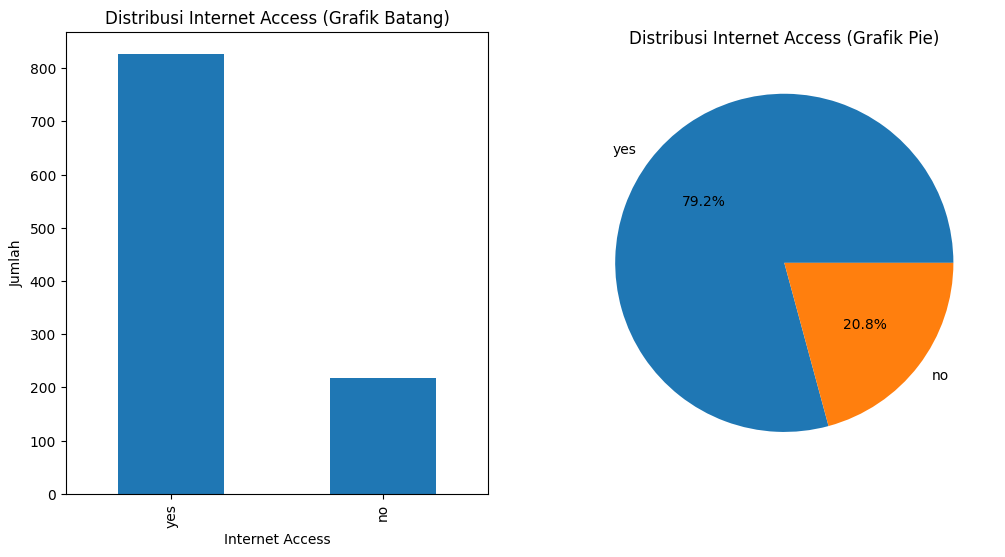

In [342]:
# Menghitung distribusi nilai dalam kolom 'internet'
internet_counts = df['internet'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
internet_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Internet Access (Grafik Batang)')
ax1.set_xlabel('Internet Access')
ax1.set_ylabel('Jumlah')

# Grafik pie
internet_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Internet Access (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.23 with a romantic relationship `
`(binary: yes or no)`

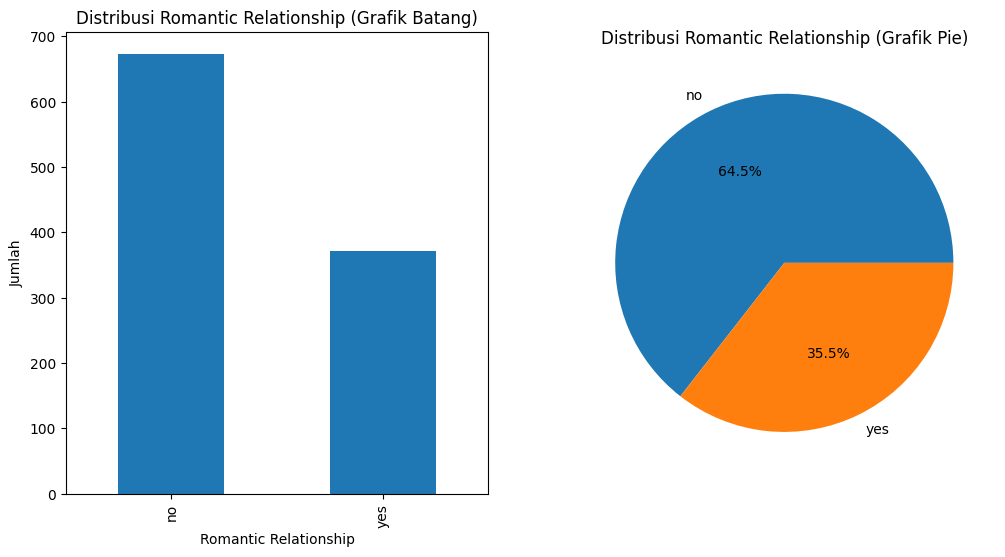

In [343]:
# Menghitung distribusi nilai dalam kolom 'romantic'
romantic_counts = df['romantic'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
romantic_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Romantic Relationship (Grafik Batang)')
ax1.set_xlabel('Romantic Relationship')
ax1.set_ylabel('Jumlah')

# Grafik pie
romantic_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Romantic Relationship (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.24 quality of family relationships `
`(numeric: from 1 - very bad to 5 - excellent)`

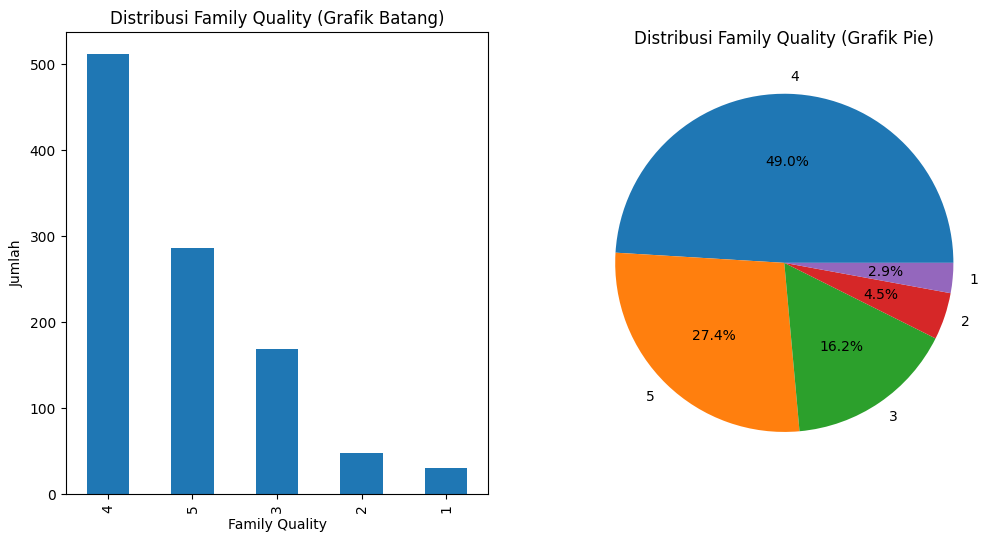

In [344]:
# Menghitung distribusi nilai dalam kolom 'family_quality'
family_quality_counts = df['family_quality'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
family_quality_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Family Quality (Grafik Batang)')
ax1.set_xlabel('Family Quality')
ax1.set_ylabel('Jumlah')

# Grafik pie
family_quality_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Family Quality (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.25 free time after school `
`(numeric: from 1 - very low to 5 - very high)`

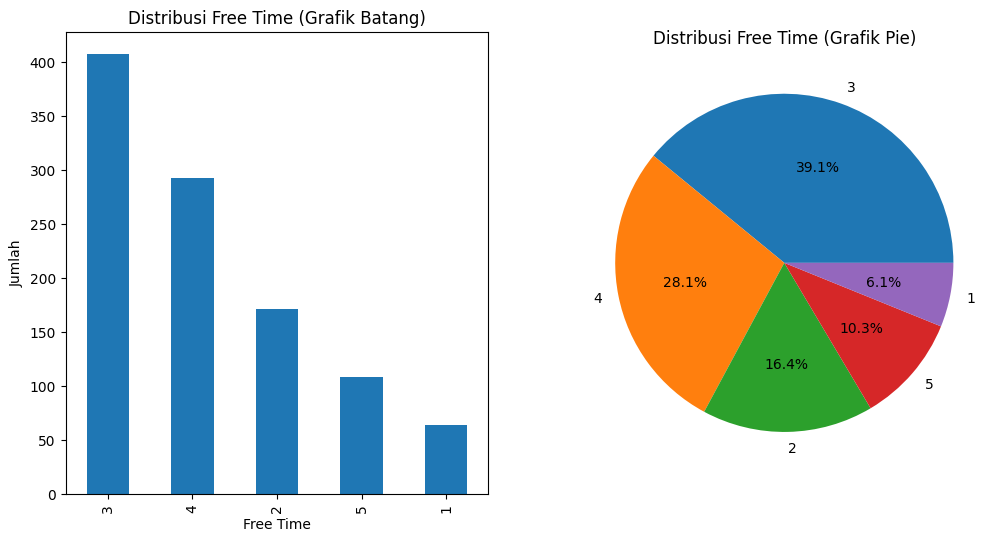

In [345]:
# Menghitung distribusi nilai dalam kolom 'free_time'
free_time_counts = df['free_time'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
free_time_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Free Time (Grafik Batang)')
ax1.set_xlabel('Free Time')
ax1.set_ylabel('Jumlah')

# Grafik pie
free_time_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Free Time (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.26 going out with friends `
`(numeric: from 1 - very low to 5 - very high)`

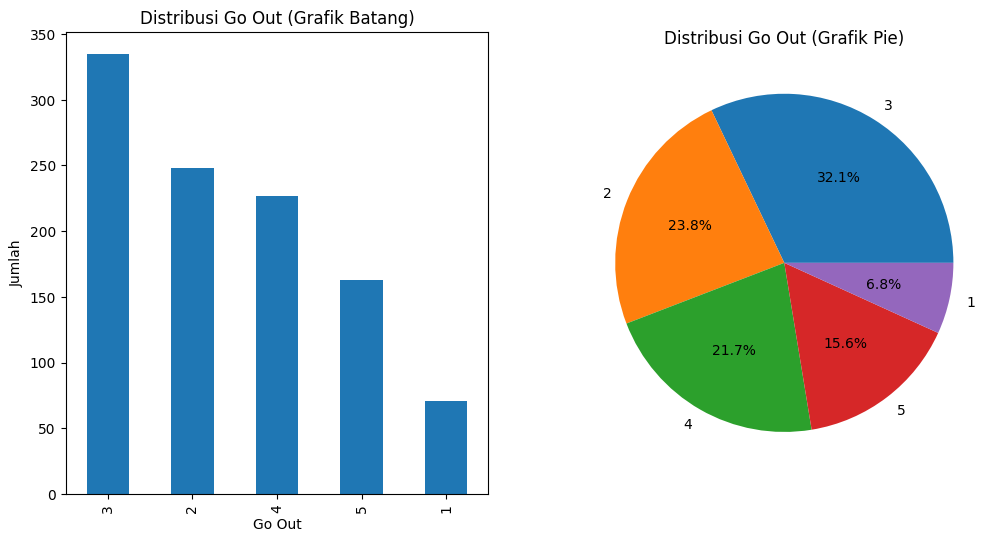

In [346]:
# Menghitung distribusi nilai dalam kolom 'go_out'
go_out_counts = df['go_out'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
go_out_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Go Out (Grafik Batang)')
ax1.set_xlabel('Go Out')
ax1.set_ylabel('Jumlah')

# Grafik pie
go_out_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Go Out (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.27 workday alcohol consumption `
`(numeric: from 1 - very low to 5 - very high)`

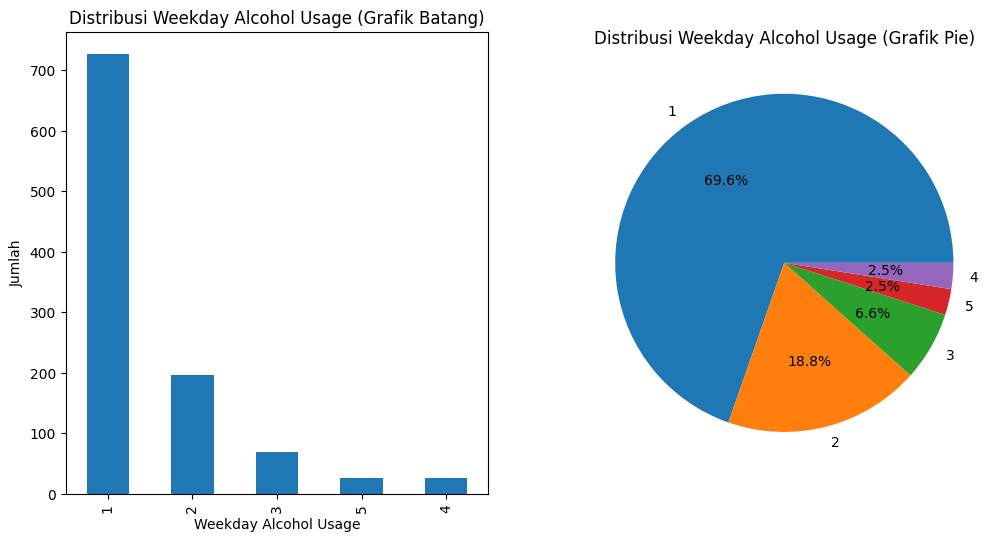

In [347]:
# Menghitung distribusi nilai dalam kolom 'weekday_alcohol_usage'
weekday_alcohol_counts = df['weekday_alcohol_usage'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
weekday_alcohol_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Weekday Alcohol Usage (Grafik Batang)')
ax1.set_xlabel('Weekday Alcohol Usage')
ax1.set_ylabel('Jumlah')

# Grafik pie
weekday_alcohol_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Weekday Alcohol Usage (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.28 weekend alcohol consumption `
`(numeric: from 1 - very low to 5 - very high)`

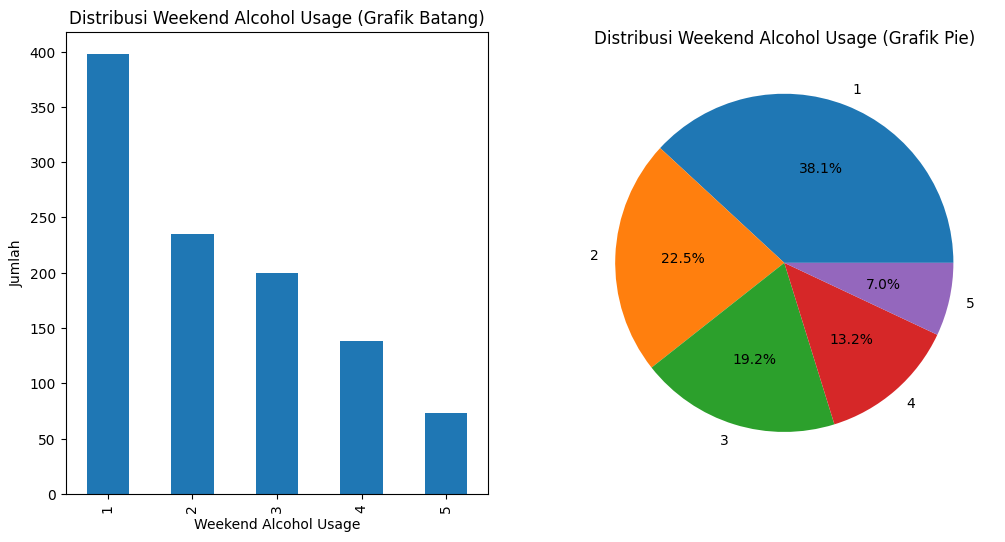

In [348]:
# Menghitung distribusi nilai dalam kolom 'weekend_alcohol_usage'
weekend_alcohol_counts = df['weekend_alcohol_usage'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
weekend_alcohol_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Weekend Alcohol Usage (Grafik Batang)')
ax1.set_xlabel('Weekend Alcohol Usage')
ax1.set_ylabel('Jumlah')

# Grafik pie
weekend_alcohol_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Weekend Alcohol Usage (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.29 current health status `
`(numeric: from 1 - very bad to 5 - very good)`

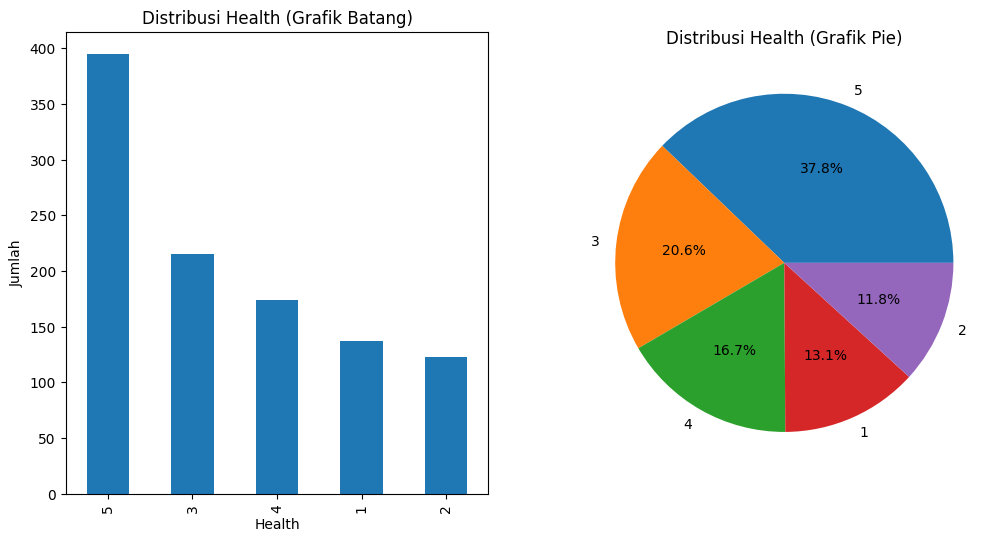

In [349]:
# Menghitung distribusi nilai dalam kolom 'health'
health_counts = df['health'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
health_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Health (Grafik Batang)')
ax1.set_xlabel('Health')
ax1.set_ylabel('Jumlah')

# Grafik pie
health_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Health (Grafik Pie)')
ax2.set_ylabel('')

plt.show()


### `2.B.30 number of school absences `
`(numeric: from 0 to 93)`

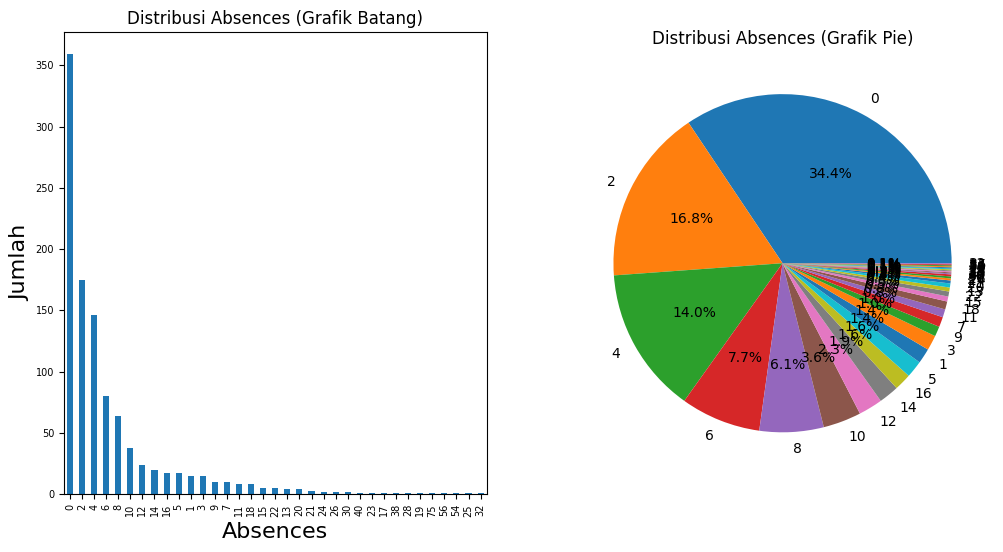

In [350]:
# Menghitung distribusi nilai dalam kolom 'absences'
absences_counts = df['absences'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
absences_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Absences (Grafik Batang)')
ax1.set_xlabel('Absences', fontsize=16)  # Atur ukuran font label x-axis
ax1.set_ylabel('Jumlah', fontsize=16)  # Atur ukuran font label y-axis
ax1.tick_params(axis='both', which='major', labelsize=7)  # Atur ukuran angka-angka di sumbu x dan y

# Grafik pie
absences_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Absences (Grafik Pie)')
ax2.set_ylabel('', fontsize=7)  # Atur ukuran font label
ax2.tick_params(axis='both', which='major', labelsize=7)  # Atur ukuran angka-angka di sumbu x dan y

plt.show()


### `2.B.31 period1_score`

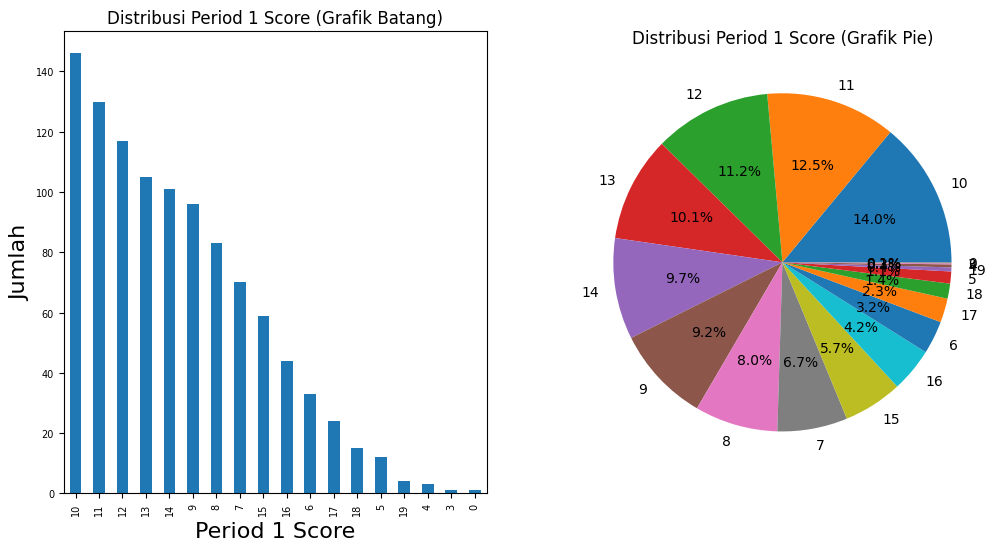

In [351]:
# Menghitung distribusi nilai dalam kolom 'period1_score'
period1_score_counts = df['period1_score'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
period1_score_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Period 1 Score (Grafik Batang)')
ax1.set_xlabel('Period 1 Score', fontsize=16)  # Atur ukuran font label x-axis
ax1.set_ylabel('Jumlah', fontsize=16)  # Atur ukuran font label y-axis
ax1.tick_params(axis='both', which='major', labelsize=7)  # Atur ukuran angka-angka di sumbu x dan y

# Grafik pie
period1_score_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Period 1 Score (Grafik Pie)')
ax2.set_ylabel('', fontsize=16)  # Atur ukuran font label
ax2.tick_params(axis='both', which='major', labelsize=7)  # Atur ukuran angka-angka di sumbu x dan y

plt.show()


### `2.B.32 period2_score`

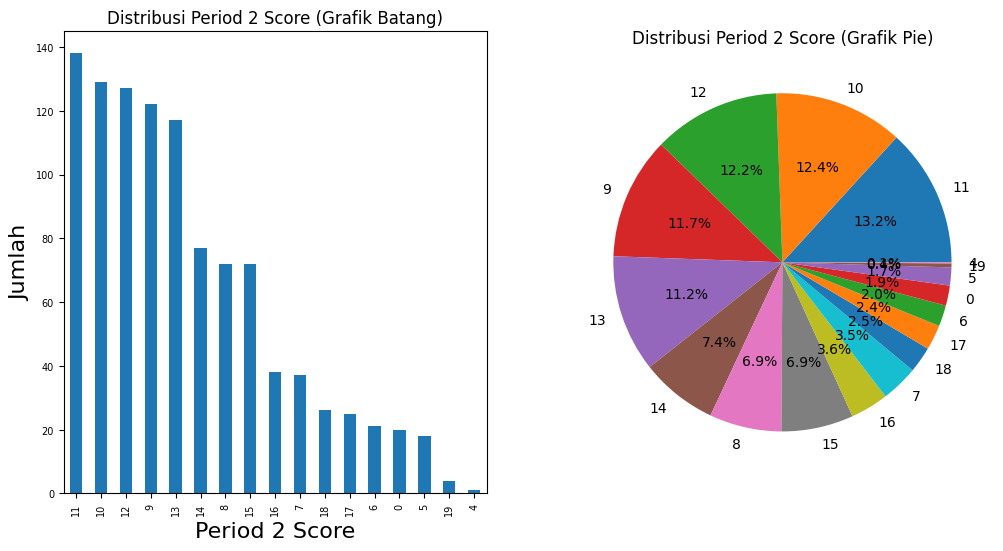

In [352]:
# Menghitung distribusi nilai dalam kolom 'period2_score'
period2_score_counts = df['period2_score'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
period2_score_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Period 2 Score (Grafik Batang)')
ax1.set_xlabel('Period 2 Score', fontsize=16)  # Atur ukuran font label x-axis
ax1.set_ylabel('Jumlah', fontsize=16)  # Atur ukuran font label y-axis
ax1.tick_params(axis='both', which='major', labelsize=7)  # Atur ukuran angka-angka di sumbu x dan y

# Grafik pie
period2_score_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Period 2 Score (Grafik Pie)')
ax2.set_ylabel('', fontsize=16)  # Atur ukuran font label
ax2.tick_params(axis='both', which='major', labelsize=7)  # Atur ukuran angka-angka di sumbu x dan y

plt.show()


### `2.B.33 final_score`

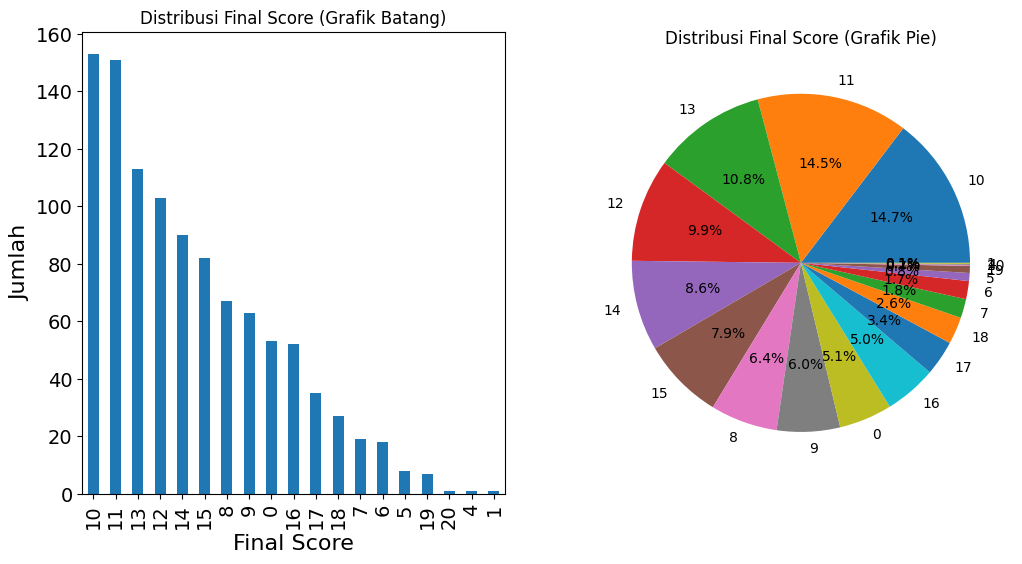

In [353]:
# Menghitung distribusi nilai dalam kolom 'final_score'
final_score_counts = df['final_score'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
final_score_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Final Score (Grafik Batang)')
ax1.set_xlabel('Final Score', fontsize=16)  # Atur ukuran font label x-axis
ax1.set_ylabel('Jumlah', fontsize=16)  # Atur ukuran font label y-axis
ax1.tick_params(axis='both', which='major', labelsize=14)  # Atur ukuran angka-angka di sumbu x dan y

# Grafik pie
final_score_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Final Score (Grafik Pie)')
ax2.set_ylabel('', fontsize=16)  # Atur ukuran font label
ax2.tick_params(axis='both', which='major', labelsize=14)  # Atur ukuran angka-angka di sumbu x dan y

plt.show()


### `2.B.34 final_grade`

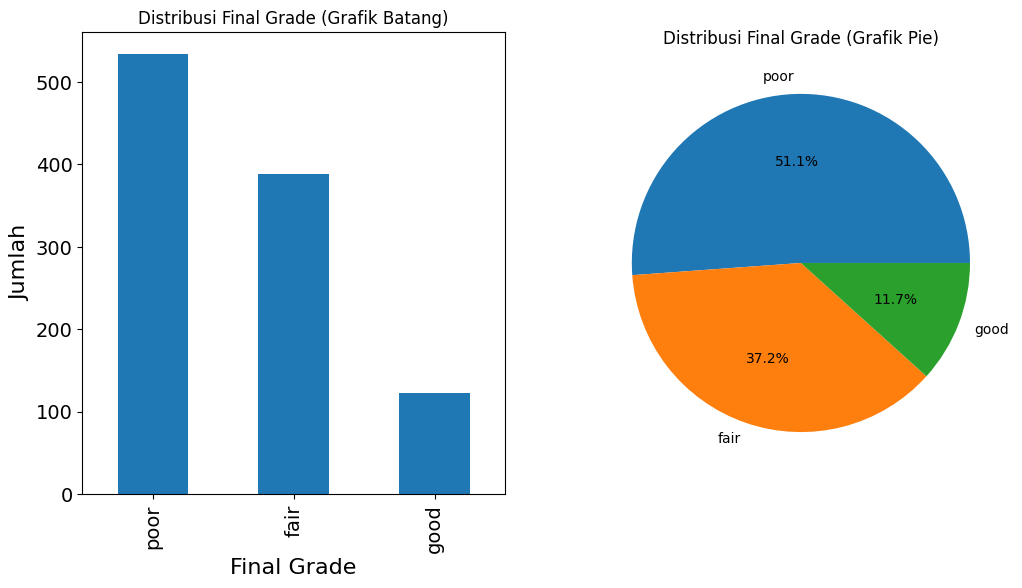

In [354]:
# Menghitung distribusi nilai dalam kolom 'final_grade'
final_grade_counts = df['final_grade'].value_counts()

# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafik batang
final_grade_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribusi Final Grade (Grafik Batang)')
ax1.set_xlabel('Final Grade', fontsize=16)  # Atur ukuran font label x-axis
ax1.set_ylabel('Jumlah', fontsize=16)  # Atur ukuran font label y-axis
ax1.tick_params(axis='both', which='major', labelsize=14)  # Atur ukuran angka-angka di sumbu x dan y

# Grafik pie
final_grade_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distribusi Final Grade (Grafik Pie)')
ax2.set_ylabel('', fontsize=16)  # Atur ukuran font label
ax2.tick_params(axis='both', which='major', labelsize=14)  # Atur ukuran angka-angka di sumbu x dan y

plt.show()


## `2.C Tampikan statistik (Mean, Median, Mode, Standard Deviation, dan Kuartil) dari setiap fitur data.`

In [355]:
# Menampilkan statistik untuk setiap fitur data
statistics = df.describe()
statistics.loc['mode'] = df.mode().iloc[0]
print("Statistik untuk Setiap Fitur Data:")
print(statistics)


Statistik untuk Setiap Fitur Data:
               age  mother_education  father_education  commute_time  \
count  1044.000000       1044.000000       1044.000000   1044.000000   
mean     16.726054          2.603448          2.387931      1.522989   
std       1.239975          1.124907          1.099938      0.731727   
min      15.000000          0.000000          0.000000      1.000000   
25%      16.000000          2.000000          1.000000      1.000000   
50%      17.000000          3.000000          2.000000      1.000000   
75%      18.000000          4.000000          3.000000      2.000000   
max      22.000000          4.000000          4.000000      4.000000   
mode     16.000000          4.000000          2.000000      1.000000   

        study_time     failures  family_quality    free_time       go_out  \
count  1044.000000  1044.000000     1044.000000  1044.000000  1044.000000   
mean      1.970307     0.264368        3.935824     3.201149     3.156130   
std       0.8

## `2.D Tampilkan distribusi dari fitur? Plot histogram untuk mengetahui hal ini. Jelaskan tentang distibusi ini. Apa yang menarik?`

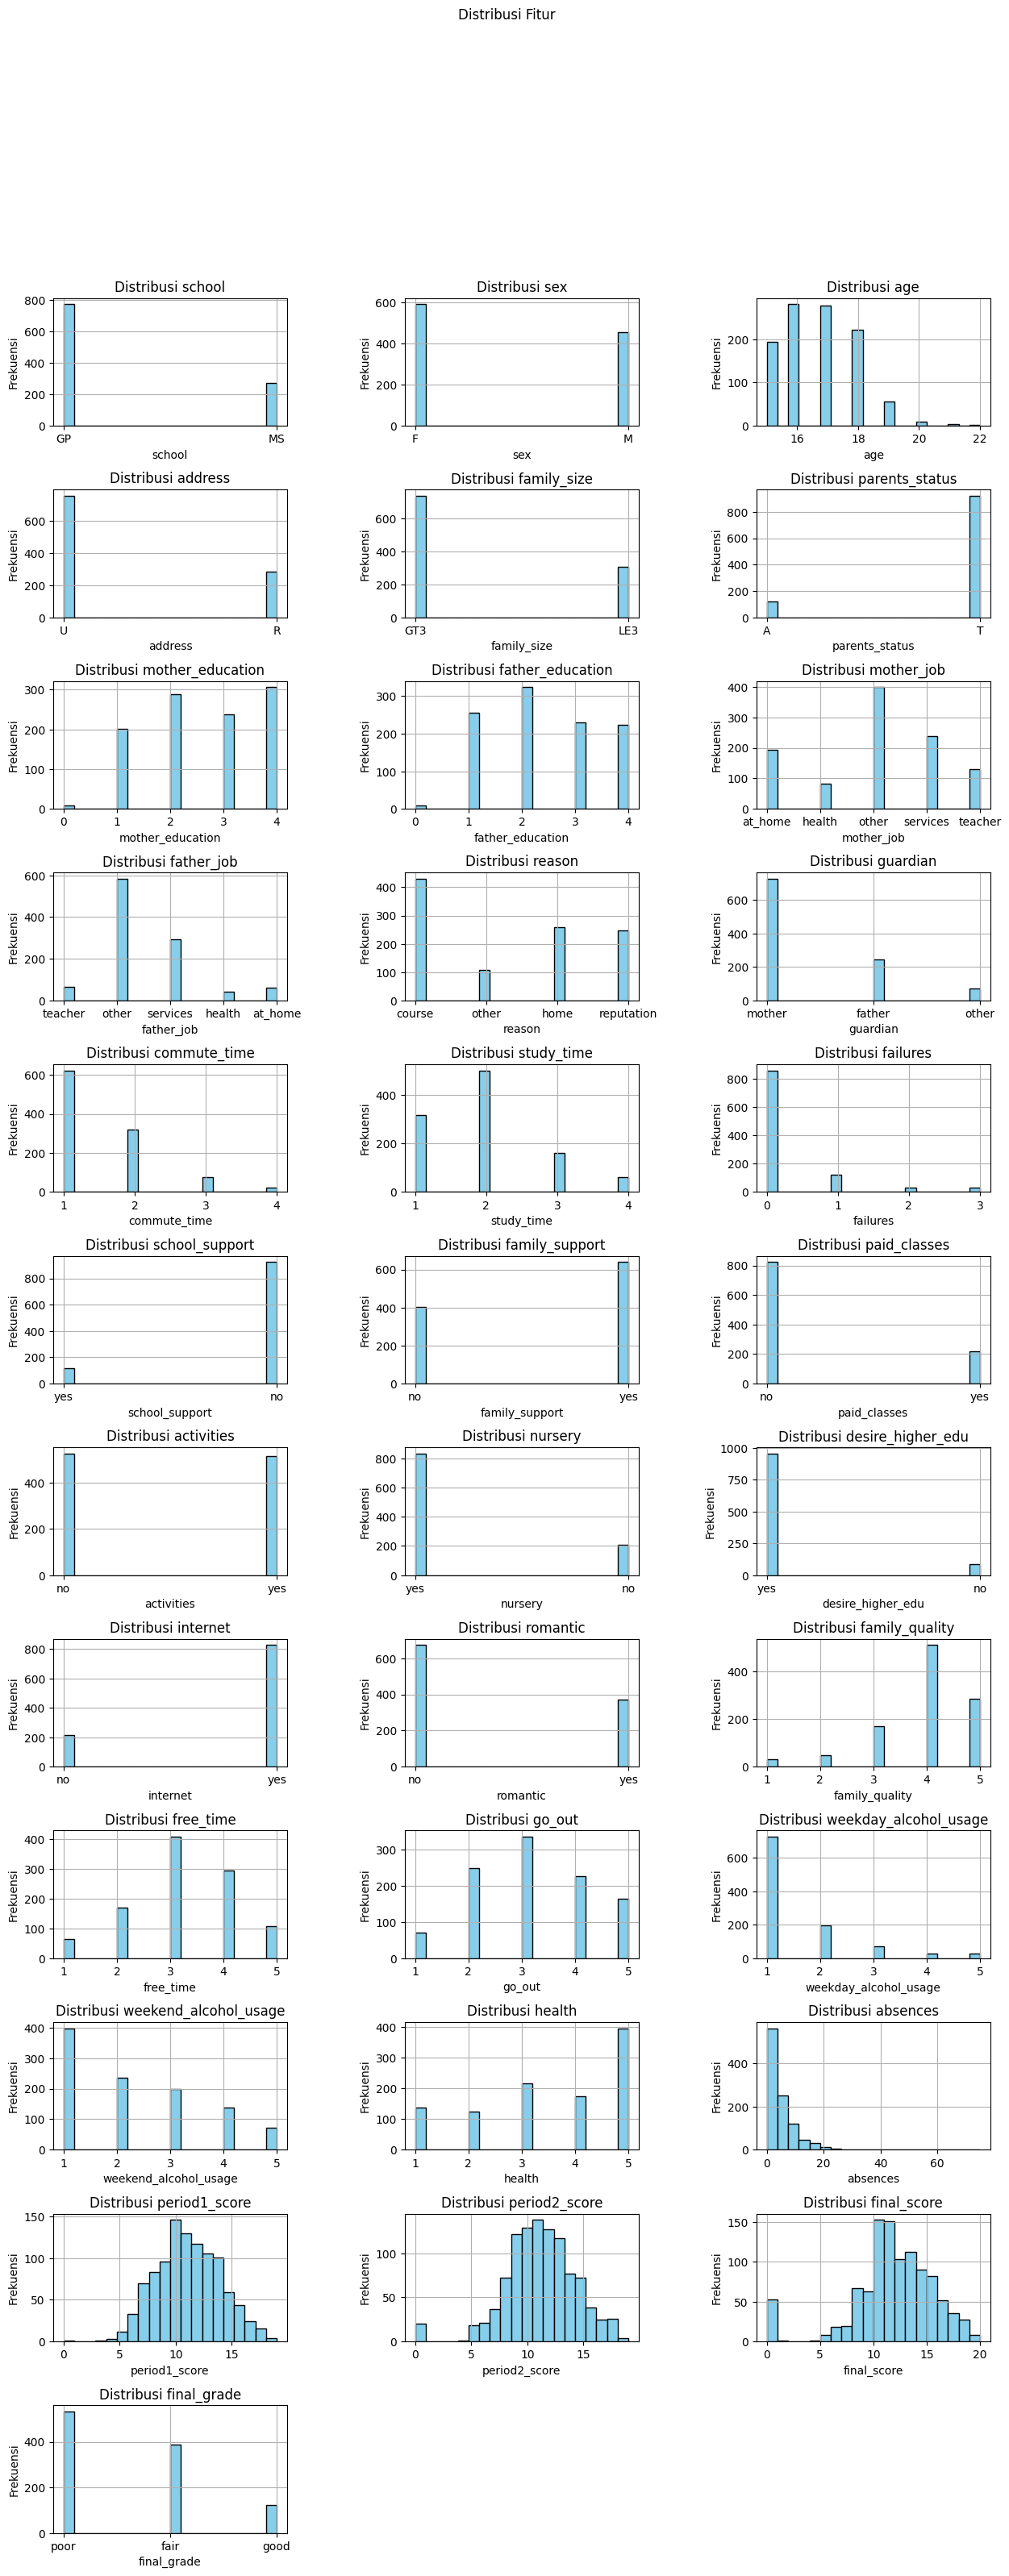

In [356]:
# Menghitung jumlah baris dan kolom subplot berdasarkan jumlah kolom dalam DataFrame
num_columns = len(df.columns)
num_rows = (num_columns // 3) + (num_columns % 3)

# Membuat subplot dengan jumlah baris dan kolom yang sesuai
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 3*num_rows))
fig.suptitle('Distribusi Fitur')

# Menyusun subplot agar lebih rapi
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Menampilkan histogram untuk setiap fitur
for i, column in enumerate(df.columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    df[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frekuensi')

# Menghilangkan subplot yang tidak terpakai
for i in range(num_columns, num_rows*3):
    fig.delaxes(axes.flatten()[i])

plt.show()

# `3. Explorasi penerapan metode machine learning konvensional`

## `3.A Gunakan konfigurasi default dari setiap mode`

### `3.A.1 Gunakan train test split : 80 dan 20%`

In [357]:
df.dtypes

school                   object
sex                      object
age                       int64
address                  object
family_size              object
parents_status           object
mother_education          int64
father_education          int64
mother_job               object
father_job               object
reason                   object
guardian                 object
commute_time              int64
study_time                int64
failures                  int64
school_support           object
family_support           object
paid_classes             object
activities               object
nursery                  object
desire_higher_edu        object
internet                 object
romantic                 object
family_quality            int64
free_time                 int64
go_out                    int64
weekday_alcohol_usage     int64
weekend_alcohol_usage     int64
health                    int64
absences                  int64
period1_score             int64
period2_

In [358]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        # Lakukan Label Encoding atau One-Hot Encoding sesuai kebutuhan
        df[column] = le.fit_transform(df[column])
        # atau
        # df = pd.get_dummies(df, columns=[column], prefix=column)


In [359]:
df.dtypes

school                   int64
sex                      int64
age                      int64
address                  int64
family_size              int64
parents_status           int64
mother_education         int64
father_education         int64
mother_job               int64
father_job               int64
reason                   int64
guardian                 int64
commute_time             int64
study_time               int64
failures                 int64
school_support           int64
family_support           int64
paid_classes             int64
activities               int64
nursery                  int64
desire_higher_edu        int64
internet                 int64
romantic                 int64
family_quality           int64
free_time                int64
go_out                   int64
weekday_alcohol_usage    int64
weekend_alcohol_usage    int64
health                   int64
absences                 int64
period1_score            int64
period2_score            int64
final_sc

In [360]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

# label encode final_grade
from sklearn import preprocessing

# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good'
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair'
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor'
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,poor
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,poor
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,fair
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,good
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,fair


In [361]:
# Import train_test_split dari sklearn.model_selection
from sklearn.model_selection import train_test_split

dfd.final_grade = le.fit_transform(dfd.final_grade)

# Kemudian, Anda dapat melanjutkan dengan pemisahan dataset seperti biasa
X = dfd.drop('final_grade', axis=1)
y = dfd.final_grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get dummy varibles
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# see total number of features
len(list(X_train))

32

### `3.A.2 Gunakan 10-fold cross validation`

#### `3.A.2.1 Naive bayes`

In [362]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

# Membuat model Naive Bayes
naive_bayes = GaussianNB()
nb_model = naive_bayes.fit(X_train, y_train)
naive_bayes_train_score = nb_model.score(X_train, y_train)
cv_scores = cross_val_score(naive_bayes, X, y, cv=10)
res_nb = nb_model.predict(X_test)
report_nb = classification_report(y_test, res_nb)

print(report_nb)
print('\n\n')
print("Akurasi Naive Bayes: ", naive_bayes_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores)


              precision    recall  f1-score   support

           0       0.63      0.36      0.46        74
           1       0.39      0.96      0.55        23
           2       0.88      0.86      0.87       112

    accuracy                           0.69       209
   macro avg       0.63      0.73      0.63       209
weighted avg       0.74      0.69      0.69       209




Akurasi Naive Bayes:  0.6550898203592814
Cross-Validation Score 10-Fold: 0.6466391941391942



Cross-Validation Score 10-Fold: [0.6        0.67619048 0.59047619 0.62857143 0.53846154 0.66346154
 0.66346154 0.73076923 0.74038462 0.63461538]


#### `3.A.2.2 Decision Tree`

In [363]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
decision_tree = DecisionTreeClassifier()
dt_model = decision_tree.fit(X_train, y_train)
decision_tree_train_score = dt_model.score(X_train, y_train)
cv_scores_dt = cross_val_score(decision_tree, X, y, cv=10)
res_dt = dt_model.predict(X_test)
report_dt = classification_report(y_test, res_dt)

print(report_dt)
print('\n\n')
print("Akurasi Decision Tree: ", decision_tree_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_dt))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_dt)


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        74
           1       0.81      0.74      0.77        23
           2       0.92      0.96      0.94       112

    accuracy                           0.89       209
   macro avg       0.86      0.84      0.85       209
weighted avg       0.89      0.89      0.89       209




Akurasi Decision Tree:  0.9988023952095808
Cross-Validation Score 10-Fold: 0.8381501831501831



Cross-Validation Score 10-Fold: [0.83809524 0.81904762 0.8952381  0.77142857 0.82692308 0.90384615
 0.88461538 0.75961538 0.82692308 0.85576923]


#### `3.A.2.3 KNN`

In [364]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Membuat model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_train_score = knn_model.score(X_train, y_train)
cv_scores_knn = cross_val_score(knn, X, y, cv=10)
res_knn = knn_model.predict(X_test)
report_knn = classification_report(y_test, res_knn)

print(report_knn)
print('\n\n')
print("Akurasi K-Nearest Neighbors (KNN): ", knn_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_knn))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_knn)


              precision    recall  f1-score   support

           0       0.78      0.78      0.78        74
           1       0.79      0.65      0.71        23
           2       0.90      0.93      0.91       112

    accuracy                           0.85       209
   macro avg       0.82      0.79      0.80       209
weighted avg       0.84      0.85      0.84       209




Akurasi K-Nearest Neighbors (KNN):  0.8862275449101796
Cross-Validation Score 10-Fold: 0.8152106227106227



Cross-Validation Score 10-Fold: [0.80952381 0.79047619 0.85714286 0.72380952 0.85576923 0.79807692
 0.83653846 0.79807692 0.79807692 0.88461538]


#### `3.A.2.4 Support Vector`

In [365]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Membuat model Support Vector Classifier (SVC)
svc = SVC()
svc_model = svc.fit(X_train, y_train)
svc_train_score = svc_model.score(X_train, y_train)
cv_scores_svc = cross_val_score(svc, X, y, cv=10)
res_svc = svc_model.predict(X_test)
report_svc = classification_report(y_test, res_svc)

print(report_svc)
print('\n\n')
print("Akurasi Support Vector Classifier (SVC): ", svc_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_svc))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_svc)


              precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.88      0.61      0.72        23
           2       0.89      0.96      0.92       112

    accuracy                           0.86       209
   macro avg       0.86      0.79      0.81       209
weighted avg       0.86      0.86      0.86       209




Akurasi Support Vector Classifier (SVC):  0.8970059880239521
Cross-Validation Score 10-Fold: 0.8764194139194139



Cross-Validation Score 10-Fold: [0.9047619  0.84761905 0.95238095 0.81904762 0.875      0.82692308
 0.875      0.89423077 0.86538462 0.90384615]


#### `3.A.2.5 Logistic regression`

In [366]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
logreg_train_score = logreg_model.score(X_train, y_train)
cv_scores_logreg = cross_val_score(logreg, X, y, cv=10)
res_logreg = logreg_model.predict(X_test)
report_logreg = classification_report(y_test, res_logreg)

print(report_logreg)
print('\n\n')
print("Akurasi Logistic Regression: ", logreg_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_logreg))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_logreg)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        74
           1       0.71      0.74      0.72        23
           2       0.87      0.93      0.90       112

    accuracy                           0.82       209
   macro avg       0.79      0.79      0.78       209
weighted avg       0.82      0.82      0.82       209




Akurasi Logistic Regression:  0.859880239520958
Cross-Validation Score 10-Fold: 0.8035256410256411



Cross-Validation Score 10-Fold: [0.85714286 0.78095238 0.86666667 0.82857143 0.75961538 0.75
 0.82692308 0.76923077 0.81730769 0.77884615]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### `3.A.2.6 XGBoost`

In [367]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Membuat model XGBoost
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)
cv_scores_xgb = cross_val_score(xgb, X, y, cv=10)
res_xgb = xgb_model.predict(X_test)
report_xgb = classification_report(y_test, res_xgb)

print(report_xgb)
print('\n\n')
print("Akurasi XGBoost: ", xgb_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_xgb))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_xgb)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82        74
           1       0.88      0.65      0.75        23
           2       0.90      0.96      0.93       112

    accuracy                           0.88       209
   macro avg       0.87      0.81      0.83       209
weighted avg       0.87      0.88      0.87       209




Akurasi XGBoost:  0.9988023952095808
Cross-Validation Score 10-Fold: 0.8668864468864468



Cross-Validation Score 10-Fold: [0.84761905 0.82857143 0.93333333 0.82857143 0.90384615 0.89423077
 0.86538462 0.875      0.83653846 0.85576923]


#### `3.A.2.7 Ada Boost`

In [368]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

# Membuat model AdaBoost
adaboost = AdaBoostClassifier()
adaboost_model = adaboost.fit(X_train, y_train)
adaboost_train_score = adaboost_model.score(X_train, y_train)
cv_scores_adaboost = cross_val_score(adaboost, X, y, cv=10)
res_adaboost = adaboost_model.predict(X_test)
report_adaboost = classification_report(y_test, res_adaboost)

print(report_adaboost)
print('\n\n')
print("Akurasi AdaBoost: ", adaboost_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_adaboost))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_adaboost)


              precision    recall  f1-score   support

           0       0.65      0.86      0.74        74
           1       0.56      0.22      0.31        23
           2       0.94      0.86      0.90       112

    accuracy                           0.79       209
   macro avg       0.72      0.65      0.65       209
weighted avg       0.80      0.79      0.78       209




Akurasi AdaBoost:  0.7532934131736527
Cross-Validation Score 10-Fold: 0.7719322344322344



Cross-Validation Score 10-Fold: [0.7047619  0.78095238 0.82857143 0.87619048 0.71153846 0.71153846
 0.78846154 0.72115385 0.78846154 0.80769231]


#### `3.A.2.8 Random Forest`

In [369]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
random_forest = RandomForestClassifier()
rf_model = random_forest.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
cv_scores_rf = cross_val_score(random_forest, X, y, cv=10)
res_rf = rf_model.predict(X_test)
report_rf = classification_report(y_test, res_rf)

print(report_rf)
print('\n\n')
print("Akurasi Random Forest: ", rf_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_rf))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_rf)


              precision    recall  f1-score   support

           0       0.88      0.81      0.85        74
           1       0.89      0.70      0.78        23
           2       0.90      0.99      0.94       112

    accuracy                           0.89       209
   macro avg       0.89      0.83      0.86       209
weighted avg       0.89      0.89      0.89       209




Akurasi Random Forest:  0.9988023952095808
Cross-Validation Score 10-Fold: 0.8860439560439561



Cross-Validation Score 10-Fold: [0.86666667 0.83809524 0.95238095 0.85714286 0.88461538 0.91346154
 0.90384615 0.88461538 0.86538462 0.89423077]


#### `3.A.2.9 Gradient Boosting`

In [370]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Membuat model Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gb_model = gradient_boosting.fit(X_train, y_train)
gb_train_score = gb_model.score(X_train, y_train)
cv_scores_gb = cross_val_score(gradient_boosting, X, y, cv=10)
res_gb = gb_model.predict(X_test)
report_gb = classification_report(y_test, res_gb)

print(report_gb)
print('\n\n')
print("Akurasi Gradient Boosting: ", gb_train_score)
print("Cross-Validation Score 10-Fold:", np.mean(cv_scores_gb))
print('\n\n')
print("Cross-Validation Score 10-Fold:", cv_scores_gb)


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        74
           1       0.84      0.70      0.76        23
           2       0.92      0.97      0.94       112

    accuracy                           0.89       209
   macro avg       0.87      0.83      0.85       209
weighted avg       0.89      0.89      0.89       209




Akurasi Gradient Boosting:  0.98562874251497
Cross-Validation Score 10-Fold: 0.8764560439560439



Cross-Validation Score 10-Fold: [0.87619048 0.80952381 0.95238095 0.84761905 0.91346154 0.875
 0.89423077 0.875      0.83653846 0.88461538]


### `3.A.3 Apakah ada perbedaan antara train test split dan 10-fold cross validation? Mengapa?`

In [371]:

print("\n \033[1m 1. Naive Bayes \033[0m")
print("-Akurasi Naive Bayes: \033[1m", naive_bayes_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores),"\033[0m")

print("\n \033[1m 2. Decision Tree \033[0m ")
print("-Akurasi Decision Tree:  \033[1m", decision_tree_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_dt),"\033[0m")

print("\n \033[1m 3. K-Nearest Neighbors (KNN) \033[0m  ")
print("-Akurasi K-Nearest Neighbors (KNN):  \033[1m", knn_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_knn),"\033[0m")

print("\n \033[1m 4. Support Vector Machine (SVM) \033[0m ")
print("-Akurasi Support Vector Classifier (SVM): \033[1m ", svc_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_svc),"\033[0m")

print("\n \033[1m 5. Logistic Regression  \033[0m ")
print("-Akurasi Logistic Regression:  \033[1m", logreg_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_logreg),"\033[0m")

print("\n \033[1m 6. XGBoost \033[0m ")
print("-Akurasi XGBoost:  \033[1m", xgb_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_xgb),"\033[0m")

print("\n \033[1m 7. AdaBoost \033[0m")
print("-Akurasi AdaBoost:  \033[1m", adaboost_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_adaboost),"\033[0m")

print("\n \033[1m 8. Random Forest \033[0m")
print("-Akurasi Random Forest:  \033[1m", rf_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_rf),"\033[0m")

print("\n \033[1m 9. Gradien Boosting \033[0m")
print("-Akurasi Gradient Boosting:  \033[1m", gb_train_score,"\033[0m")
print("-Cross-Validation Score 10-Fold: \033[1m", np.mean(cv_scores_gb),"\033[0m")


# Daftar nilai akurasi untuk setiap algoritma
accuracy_scores = {
    "Naive Bayes": naive_bayes_train_score,
    "Decision Tree": decision_tree_train_score,
    "K-Nearest Neighbors (KNN)": knn_train_score,
    "Support Vector Classifier (SVM)": svc_train_score,
    "Logistic Regression": logreg_train_score,
    "XGBoost": xgb_train_score,
    "AdaBoost": adaboost_train_score,
    "Random Forest": rf_train_score,
    "Gradient Boosting": gb_train_score
}

# Daftar nilai cross-validation untuk setiap algoritma
cv_scores = {
    "Naive Bayes": np.mean(cv_scores),
    "Decision Tree": np.mean(cv_scores_dt),
    "K-Nearest Neighbors (KNN)": np.mean(cv_scores_knn),
    "Support Vector Classifier (SVM)": np.mean(cv_scores_svc),
    "Logistic Regression": np.mean(cv_scores_logreg),
    "XGBoost": np.mean(cv_scores_xgb),
    "AdaBoost": np.mean(cv_scores_adaboost),
    "Random Forest": np.mean(cv_scores_rf),
    "Gradient Boosting": np.mean(cv_scores_gb)
}

# Temukan algoritma terbaik dan terburuk berdasarkan Cross-Validation Score
best_algorithm_cv = max(cv_scores, key=cv_scores.get)
worst_algorithm_cv = min(cv_scores, key=cv_scores.get)

# Cetak hasilnya
print(f"\nAlgoritma terbaik berdasarkan Cross-Validation Score adalah: \033[1m{best_algorithm_cv}\033[0m dengan skor {cv_scores[best_algorithm_cv]}")
print(f"Algoritma terburuk berdasarkan Cross-Validation Score adalah: \033[1m{worst_algorithm_cv}\033[0m dengan skor {cv_scores[worst_algorithm_cv]}")


print("\n Ya, terdapat perbedaan antara Train-Test Split dan 10-Fold Cross Validation dalam hal cara pembagian dataset dan evaluasi model. Berikut adalah perbedaan utama keduanya:\n")

print("1. \033[1mPembagian Dataset:\033[0m")
print("   - \033[1mTrain-Test Split:\033[0m Membagi dataset menjadi dua bagian: satu untuk pelatihan (training) dan satu untuk pengujian (testing). Biasanya, sebagian besar data digunakan untuk pelatihan, dan sebagian kecil digunakan untuk pengujian (misalnya, 80% pelatihan, 20% pengujian).")
print("   - \033[1m10-Fold Cross Validation:\033[0m Membagi dataset menjadi 10 bagian (fold). Model dilatih dan diuji sebanyak 10 kali. Pada setiap iterasi, satu fold digunakan sebagai data pengujian, sedangkan sembilan fold lainnya digunakan sebagai data pelatihan. Proses ini diulang sebanyak 10 kali, sehingga setiap fold menjadi data pengujian tepat satu kali.")

print("\n2. \033[1mEvaluasi Model:\033[0m")
print("   - \033[1mTrain-Test Split:\033[0m Model dievaluasi hanya pada satu set pengujian yang telah ditentukan sebelumnya. Evaluasi ini dapat bervariasi tergantung pada bagaimana data dipecah.")
print("   - \033[1m10-Fold Cross Validation:\033[0m Model dievaluasi pada 10 set pengujian yang berbeda, dan hasil evaluasi akhir adalah rata-rata dari hasil evaluasi pada setiap iterasi. Ini memberikan gambaran yang lebih baik tentang kinerja model di berbagai subset data.")

print("\n3. \033[1mKeuntungan dan Kekurangan:\033[0m")
print("   - \033[1mTrain-Test Split:\033[0m Lebih cepat, tetapi hasil evaluasinya dapat bervariasi tergantung pada bagaimana dataset dibagi. Performa model mungkin mendapatkan hasil yang sangat baik atau buruk tergantung pada subset tertentu yang digunakan untuk pengujian.")
print("   - \033[1m10-Fold Cross Validation:\033[0m Memberikan estimasi kinerja model yang lebih stabil dan dapat diandalkan karena model dievaluasi pada multiple subsets data. Namun, memerlukan lebih banyak waktu komputasi.")

print("\n Pemilihan antara Train-Test Split dan Cross Validation bergantung pada jumlah data yang tersedia, kebutuhan akan estimasi yang lebih stabil, dan seberapa besar kita ingin melatih model pada seluruh dataset. Cross-validation lebih disukai ketika dataset relatif kecil dan kita ingin meminimalkan efek kebetulan dalam pembagian data.")



  1. Naive Bayes 
-Akurasi Naive Bayes:  0.6550898203592814 
-Cross-Validation Score 10-Fold:  0.6466391941391942 

  2. Decision Tree  
-Akurasi Decision Tree:   0.9988023952095808 
-Cross-Validation Score 10-Fold:  0.8381501831501831 

  3. K-Nearest Neighbors (KNN)   
-Akurasi K-Nearest Neighbors (KNN):   0.8862275449101796 
-Cross-Validation Score 10-Fold:  0.8152106227106227 

  4. Support Vector Machine (SVM)  
-Akurasi Support Vector Classifier (SVM):   0.8970059880239521 
-Cross-Validation Score 10-Fold:  0.8764194139194139 

  5. Logistic Regression   
-Akurasi Logistic Regression:   0.859880239520958 
-Cross-Validation Score 10-Fold:  0.8035256410256411 

  6. XGBoost  
-Akurasi XGBoost:   0.9988023952095808 
-Cross-Validation Score 10-Fold:  0.8668864468864468 

  7. AdaBoost 
-Akurasi AdaBoost:   0.7532934131736527 
-Cross-Validation Score 10-Fold:  0.7719322344322344 

  8. Random Forest 
-Akurasi Random Forest:   0.9988023952095808 
-Cross-Validation Score 10-Fold:  0.88

## `3.B Dari masing2 metode machine learning, tuning, minimal 5 nilai hype rparameternya. Jadi setidaknya ada 5x8 hasil, train-test split 80,20`

In [372]:
from sklearn import model_selection

nb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
adb = AdaBoostClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

In [373]:
print('nb',nb.get_params())
print()
print('dt',dt.get_params())
print()
print('knn',knn.get_params())
print()
print('svc',svc.get_params())
print()
print('lr',lr.get_params())
print()
print('xgb',xgb.get_params())
print()
print('adb',adb.get_params())
print()
print('rf',rf.get_params())
print()
print('gb',gb.get_params())

nb {'priors': None, 'var_smoothing': 1e-09}

dt {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

knn {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

svc {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

lr {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'to

### `3.B.1 Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?`

#### `3.B.1.1 Naive bayes`

In [374]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Membuat model Naive Bayes
nb = GaussianNB()

# Define hyperparameter grid for Naive Bayes
param_grid = {
    'priors': [None, None, None],
    'var_smoothing': [1e-09, 1e-08, 1e-07]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search_nb.fit(X_train, y_train)

# Print the best hyperparameter values for Naive Bayes
naive_bayes_best_params = grid_search_nb.best_params_
naive_bayes_best_score = grid_search_nb.best_score_
print("Best Hyperparameters for Naive Bayes:", naive_bayes_best_params)

# The accuracies
print("Best score accuracy for Naive Bayes hyperparameter tuning:", naive_bayes_best_score)


Best Hyperparameters for Naive Bayes: {'priors': None, 'var_smoothing': 1e-07}
Best score accuracy for Naive Bayes hyperparameter tuning: 0.6946787148594377


#### `3.B.1.2 Decision Tree`

In [375]:
# Define hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Ganti 'auto' dengan 'sqrt'
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values for Decision Tree
decision_tree_best_params = grid_search.best_params_
decision_tree_best_score = grid_search.best_score_
print("Best Hyperparameters for Decision Tree:", decision_tree_best_params)

# The accuracies
print("Best score accuracy for Decision Tree hyperparameter tuning:", decision_tree_best_score)


Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning: 0.8706683878370626


#### `3.B.1.3 KNN`

In [376]:
# Define hyperparameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values
knn_train_best_params = grid_search.best_params_
knn_train_best_score = grid_search.best_score_
print("Best Hyperparameters:", knn_train_best_params)

# The accuracies
print("Best score accuracy for KNN hyperparameter tuning:", knn_train_best_score)

Best Hyperparameters: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best score accuracy for KNN hyperparameter tuning: 0.8479202524383247


#### `3.B.1.4 Support Vector`

In [377]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': [0.1, 1, 'auto'],
    'class_weight': [None, 'balanced']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values
svc_best_params = grid_search.best_params_
svc_best_score = grid_search.best_score_
print("Best Hyperparameters:", svc_best_params)

# The accuracies
print("Best score accuracy for SVM hyperparameter tuning:", svc_best_score)

Best Hyperparameters: {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for SVM hyperparameter tuning: 0.8982358003442341


#### `3.B.1.5 Logistic regression`

In [378]:
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# ... (your other import statements)

# Define hyperparameter grid with reduced values
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, n_iter=10, cv=kfold, scoring=scoring)
random_search.fit(X_train, y_train)

# Print the best hyperparameter values
logreg_best_params = random_search.best_params_
logreg_best_score = random_search.best_score_
print("Best Hyperparameters:", logreg_best_params)

# The accuracies
print("Best score accuracy for Logistic Regression hyperparameter tuning:", logreg_best_score)

# Make predictions
predictions = random_search.best_estimator_.predict(X_test)

# Calculate accuracy for each model
accuracy = metrics.accuracy_score(y_test, predictions)

# Compare the accuracies
print("Accuracy for Logistic Regression hyperparameter tuning:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 500, 'C': 1}
Best score accuracy for Logistic Regression hyperparameter tuning: 0.8730780263912793
Accuracy for Logistic Regression hyperparameter tuning: 0.8755980861244019


#### `3.B.1.6 XGBoost`

In [379]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid with reduced values
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, cv=kfold, scoring=scoring)
random_search.fit(X_train, y_train)

# Print the best hyperparameter values
xgb_best_params = random_search.best_params_
xgb_best_score = random_search.best_score_
print("Best Hyperparameters:", xgb_best_params)

# The accuracies
print("Accuracy for XGBoost hyperparameter tuning:", xgb_best_score)


Best Hyperparameters: {'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2}
Accuracy for XGBoost hyperparameter tuning: 0.9054503729202524


#### `3.B.1.7 Ada Boost`

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define AdaBoostClassifier with estimator instead of base_estimator
adb = AdaBoostClassifier(base_estimator=base_estimator)

# Define hyperparameter grid with reduced values
param_grid = {
    'learning_rate': [0.01, 0.1, 1.0],  # Reduced values
    'n_estimators': [50, 100],  # Reduced values
    'algorithm': ["SAMME.R"],
    'random_state': [42],
    'base_estimator': [DecisionTreeClassifier(max_depth=1)]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values
adaboost_best_params = grid_search.best_params_
adaboost_best_score = grid_search.best_score_
print("Best Hyperparameters:", adaboost_best_params)

# The accuracies
print("Best score accuracy for Adaboost hyperparameter tuning:", adaboost_best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Hyperparameters: {'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}
Best score accuracy for Adaboost hyperparameter tuning: 0.8215576592082616


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### `3.B.1.8 Random Forest`

In [381]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Subset data untuk tuning (gunakan sebagian kecil data untuk mempercepat)
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],  # Kurangi jumlah nilai
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=kfold, scoring=scoring, n_jobs=-1, verbose=2)

# Proses tuning hyperparameter tanpa tqdm
grid_search.fit(X_train_subset, y_train_subset)

# Print the best hyperparameter values
rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_
print("Best Hyperparameters:", rf_best_params)

# The accuracies
print("Best Score accuracy for Random Forest hyperparameter tuning:", rf_best_score)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score accuracy for Random Forest hyperparameter tuning: 0.8974561403508773


#### `3.B.1.9 Gradient Boosting`

In [382]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distributions
param_dist = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [3, 5, 7]
}

# Perform randomized hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=kfold, scoring=scoring)
random_search.fit(X_train, y_train)

# Print the best hyperparameter values
gb_best_params = random_search.best_params_
gb_best_score = random_search.best_score_
print("Best Hyperparameters:", gb_best_params)

# Compare the accuracies
print("Best Score accuracy for Gradient Boosting hyperparameter tuning:", gb_best_score)


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5}
Best Score accuracy for Gradient Boosting hyperparameter tuning: 0.8970309810671256


In [383]:
pip install tabulate

In [384]:
print("\n Setelah kita melakukan tuning hyper-parameter disetiap metode machine learning konvensional mari kita perhatikan hasil akurasi untuk setiap metode dengan pengaturan hyperparameter terbaik:")

# Print results for Naive Bayes
print("\n 1. Naive Bayes")
print("Best Hyperparameters for Naive Bayes:", naive_bayes_best_params)
print("Best score accuracy for Naive Bayes hyperparameter tuning:", naive_bayes_best_score)

# Print results for Decision Tree
print("\n 2. Decision Tree")
print("Best Hyperparameters for Decision Tree:", decision_tree_best_params)
print("Best score accuracy for Decision Tree hyperparameter tuning:", decision_tree_best_score)

# Print results for KNN
print("\n 3. KNN")
print("Best Hyperparameters:", knn_train_best_params)
print("Best score accuracy for KNN hyperparameter tuning:", knn_train_best_score)

# Print results for Support Vector
print("\n 4. Support Vector")
print("Best Hyperparameters:", svc_best_params)
print("Best score accuracy for SVM hyperparameter tuning:", svc_best_score)

# Print results for Logistic Regression
print("\n 5. Logistic regression")
print("Best Hyperparameters:", logreg_best_params)
print("Best score accuracy for Logistic Regression hyperparameter tuning:", logreg_best_score)

# Print results for XGBoost
print("\n 6. XGBoost")
print("Best Hyperparameters:", xgb_best_params)
print("Accuracy for XGBoost hyperparameter tuning:", xgb_best_score)

# Print results for Ada Boost
print("\n 7. Ada Boost")
print("Best Hyperparameters:", adaboost_best_params)
print("Best score accuracy for Adaboost hyperparameter tuning:", adaboost_best_score)

# Print results for Random Forest
print("\n 8. Random Forest")
print("Best Hyperparameters:", rf_best_params)
print("Best Score accuracy for Random Forest hyperparameter tuning:", rf_best_score)

# Print results for Gradient Boosting
print("\n 9. Gradient Boosting")
print("Best Hyperparameters:", gb_best_params)
print("Best Score accuracy for Gradient Boosting hyperparameter tuning:", gb_best_score)


from tabulate import tabulate

# Menyusun hasil tuning hyperparameter
results = [
    ("Naive Bayes", naive_bayes_best_params, naive_bayes_best_score),
    ("Decision Tree", decision_tree_best_params, decision_tree_best_score),
    ("KNN", knn_train_best_params, knn_train_best_score),
    ("Support Vector", svc_best_params, svc_best_score),
    ("Logistic Regression", logreg_best_params, logreg_best_score),
    ("XGBoost", xgb_best_params, xgb_best_score),
    ("Ada Boost", adaboost_best_params, adaboost_best_score),
    ("Random Forest", rf_best_params, rf_best_score),
    ("Gradient Boosting", gb_best_params, gb_best_score)
]

# Membuat DataFrame pandas untuk perbandingan
comparison_df = pd.DataFrame(results, columns=["Algorithm", "Best Hyperparameters", "Best Score Accuracy"])

# Menampilkan algoritma terbaik dan terburuk
best_algorithm = max(results, key=lambda x: x[2])
worst_algorithm = min(results, key=lambda x: x[2])

# Menambahkan baris untuk algoritma terbaik dan terburuk
best_row = pd.DataFrame({"Algorithm": "Best",
                         "Best Hyperparameters": best_algorithm[1],
                         "Best Score Accuracy": best_algorithm[2]}, index=[len(comparison_df)])
worst_row = pd.DataFrame({"Algorithm": "Worst",
                          "Best Hyperparameters": worst_algorithm[1],
                          "Best Score Accuracy": worst_algorithm[2]}, index=[len(comparison_df) + 1])

# comparison_df = pd.concat([comparison_df, best_row, worst_row])

# Menampilkan tabel perbandingan menggunakan tabulate
print("\n", tabulate(comparison_df, headers='keys', tablefmt='pretty'))

print("\n Jumlah hyperparameter: Model dengan lebih sedikit hyperparameter mungkin lebih mudah diatur dan lebih efisien untuk dilatih.")
print("\n Interpretabilitas: Beberapa model, seperti Decision Tree, lebih mudah diinterpretasikan daripada model kompleks seperti XGBoost.")

# Print hasil algoritma terbaik dan terburuk
print("\n Algoritma Terbaik:")
print(f"Metode: {best_algorithm[0]}")
print(f"Best Hyperparameters: {best_algorithm[1]}")
print(f"Best Score Accuracy: {best_algorithm[2]}")

print("\n Algoritma Terburuk:")
print(f"Metode: {worst_algorithm[0]}")
print(f"Best Hyperparameters: {worst_algorithm[1]}")
print(f"Best Score Accuracy: {worst_algorithm[2]}")



 Setelah kita melakukan tuning hyper-parameter disetiap metode machine learning konvensional mari kita perhatikan hasil akurasi untuk setiap metode dengan pengaturan hyperparameter terbaik:

 1. Naive Bayes
Best Hyperparameters for Naive Bayes: {'priors': None, 'var_smoothing': 1e-07}
Best score accuracy for Naive Bayes hyperparameter tuning: 0.6946787148594377

 2. Decision Tree
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score accuracy for Decision Tree hyperparameter tuning: 0.8706683878370626

 3. KNN
Best Hyperparameters: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best score accuracy for KNN hyperparameter tuning: 0.8479202524383247

 4. Support Vector
Best Hyperparameters: {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best score accuracy for SVM hyperparameter tuning: 0.8982358003442341

 5.

### `3.B.2 Hasil dari set-up hyper parameter terbaik setiap metode, bandingkan dengan antar metode. Mana yang paling baik? Jelaskan mengapa?`

In [386]:
print("\n 1. Best score accuracy for Naive Bayes: ", naive_bayes_best_score)
print("\n 2. Best score accuracy for Decision Tree: ", decision_tree_best_score)
print("\n 3. Best score accuracy for KNN: ", knn_train_best_score)
print("\n 4. Best score accuracy for Support Vector: ", svc_best_score)
print("\n 5. Best score accuracy for Logistic Regression: ", logreg_best_score)
print("\n 6. Best score accuracy for XGBoost: ", xgb_best_score)
print("\n 7. Best score accuracy for Ada Boost: ", adaboost_best_score)
print("\n 8. Best Score accuracy for Random Forest: ", rf_best_score)
print("\n 9. Best Score accuracy for Gradient Boosting: ", gb_best_score)

# Menyusun hasil tuning hyperparameter
results = [
    ("Naive Bayes", naive_bayes_best_params, naive_bayes_best_score),
    ("Decision Tree", decision_tree_best_params, decision_tree_best_score),
    ("KNN", knn_train_best_params, knn_train_best_score),
    ("Support Vector", svc_best_params, svc_best_score),
    ("Logistic Regression", logreg_best_params, logreg_best_score),
    ("XGBoost", xgb_best_params, xgb_best_score),
    ("Ada Boost", adaboost_best_params, adaboost_best_score),
    ("Random Forest", rf_best_params, rf_best_score),
    ("Gradient Boosting", gb_best_params, gb_best_score)
]

# Membuat DataFrame pandas untuk perbandingan
comparison_df = pd.DataFrame(results, columns=["Algorithm", "Best Hyperparameters", "Best Score Accuracy"])

# Menentukan algoritma terbaik dan terburuk
best_algorithm = comparison_df.iloc[comparison_df["Best Score Accuracy"].idxmax()]
worst_algorithm = comparison_df.iloc[comparison_df["Best Score Accuracy"].idxmin()]

# Menampilkan tabel perbandingan menggunakan tabulate
print("\n")
print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))

# Menampilkan kesimpulan
print("\nDari data di atas, dapat kita lihat metode terbaik setelah tuning/setting hyper-parameternya adalah:")
print(f"Metode Terbaik: {best_algorithm['Algorithm']}")
print(f"Nilai Akurasi Terbaik: {best_algorithm['Best Score Accuracy']}")
print(f"Metode Terburuk: {worst_algorithm['Algorithm']}")
print(f"Nilai Akurasi Terburuk: {worst_algorithm['Best Score Accuracy']}")
print("\nNamun, keputusan tergantung pada kebutuhan spesifik tugas dan preferensi terkait interpretabilitas.")



 1. Best score accuracy for Naive Bayes:  0.6946787148594377

 2. Best score accuracy for Decision Tree:  0.8706683878370626

 3. Best score accuracy for KNN:  0.8479202524383247

 4. Best score accuracy for Support Vector:  0.8982358003442341

 5. Best score accuracy for Logistic Regression:  0.8730780263912793

 6. Best score accuracy for XGBoost:  0.9054503729202524

 7. Best score accuracy for Ada Boost:  0.8215576592082616

 8. Best Score accuracy for Random Forest:  0.8974561403508773

 9. Best Score accuracy for Gradient Boosting:  0.8970309810671256


+---+---------------------+------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+
|   |      Algorithm      |                                                              Best Hyperparameters                                                              | Best Score Accuracy |
+---+---------------------+----------------

### `3.B.3 (Bonus) Bandingkan jika menggunakan grid search. Apakah hasil yang diperoleh sama untuk hyperparameternya? Mengapa?`

Jika Anda menggunakan teknik cross-validation dengan Grid Search untuk memilih hyperparameter, hasilnya dapat berbeda tergantung pada beberapa faktor. Meskipun tujuan utama Grid Search adalah menemukan kombinasi hyperparameter yang paling efisien, beberapa faktor dapat menyebabkan hasil yang berbeda:

1. Data Variabel  
Membagi data ke dalam subset pelatihan dan pengujian yang berbeda pada setiap iterasi cross-validation dapat menghasilkan hasil yang berbeda jika data Anda memiliki banyak variabilitas atau sifat stokastik.

2. Randomness dalam Algoritma  
Beberapa algoritma pembelajaran mesin memiliki elemen keacakan, terutama jika mereka menggunakan inisialisasi acak atau subsampling acak. Hal ini dapat menyebabkan variasi dalam hasil, terutama jika pencarian Grid memerlukan pemilihan parameter stokastik.

3. Ukuran kumpulan data  
Ukuran kumpulan data juga dapat mempengaruhi stabilitas hasil.Pada kumpulan data kecil, variasi dalam berbagi data dan pelatihan model dapat berdampak lebih besar.

4. Pilihan ukuran evaluasi  
Pilihan ukuran evaluasi dapat mempengaruhi hasil pencarian grid.Pengukuran yang berbeda dapat memberikan evaluasi yang berbeda untuk model yang sama.

5. Memilih ruang hyperparameter
Jika ruang hyperparameter  yang dieksplorasi oleh Pencarian Grid  tidak cukup detail atau terlalu terbatas, hasilnya mungkin tidak menyertakan kombinasi hyperparameter yang optimal.

Namun, meskipun hasilnya mungkin berbeda, pencarian grid dengan teknik validasi silang tetap bermanfaat dalam  evaluasi model.Penggunaannya membantu menghindari overfitting pada satu set pelatihan  dan memberikan estimasi performa model yang lebih baik  pada data yang tidak terlihat. Idealnya, saat menggunakan pencarian grid, Anda  tidak boleh hanya melihat  hasil tertentu namun mencoba memahami variasi hasil dan mengambil keputusan berdasarkan tren umum.

Jika Anda menemukan bahwa hasilnya sangat bervariasi atau tidak konsisten, ini mungkin merupakan sinyal untuk  memeriksa dan memahami perilaku model Anda pada data yang berbeda secara lebih detail.

